# Singular Value Decomposition

<i>These are notes taken following on from Steve Brunton's lectures on the SVD, with supplements/proofs from elsewhere when required. I'm writing in Jupyter because I expect coded examples.</i>

<div class="alert alert-block alert-warning">
    <b>Note:</b> for coded examples which require datasets, I try to script each of those cells to automatically import those directories from the repo. I have tested the git repo in cmd and it works, but because of that I have not tested it in Jupyter, so if it doesn't work, it's either because of the os package or a quirk of Jupyter/ your conda env.

<div class="alert alert-block alert-success">

[<b>Singular Value Decomposition Video Lectures</b>](https://www.youtube.com/watchv=nbBvuuNVfco&list=PLMrJAkhIeNNQV7wi9r7Kut8liLFMWQOXn&index=22) | 
[<b>Data-Driven Science and Engineering Digital Book</b>](http://databookuw.com/) | 
[<b>Data Repository for this Notebook</b>](https://code.ewota.com/share/Data_Driven_Science_Python_Demos/src/branch/master/DATA)

<div class="alert alert-block alert-success">
    
### Contents:

 - [Mathematical Overview](#Mathematical-Overview:)
 - [Matrix Approximation](#Matrix-Approximation:)
 - Coded Example: [Image Compression](#Image-Compression)
 - [Dominant Correlations](#Dominant-Correlations)
 - [SVD Method of Snapshots](#SVD-Method-of-Snapshots)
 - [Unitary Transformations and Geometry](#Unitary-Transformations-and-Geometry)
 - [Least Squares, Regression and the Pseudo-Inverse](#Least-Squares,-Regression,-and-the-Pseudo-inverse)
 - [Linear Systems of Equations](#Linear-Systems-of-Equations)
 - [Linear Regression](#Linear-Regression)
 - [Principal Component Analysis](#Principal-Component-Analysis)
 - Coded Example: [Eigenfaces](#Eigenfaces)
 - [Optimal Truncation for the SVD](#Optimal-Truncation-for-the-SVD)
 - Coded Example [Importance of Alignment](#Importance-of-Alignment)
 - [Randomised Singular Value Decomposition](#Randomised-Singular-Value-Decomposition)
 - [Power Iterations and Oversampling](#Power-Iterations-and-Oversampling)

<div class="alert alert-block alert-info">

#### What is a Singular Value Decomposition?

Some matrix $\mathbf{A}$ <i>linearly transforms</i> any vector $\mathbf{u}$ into some vector $\mathbf{y}$

$$\mathbf{A}\mathbf{u} = \mathbf{y}$$

We are often interested in finding a pair of orthogonal vectors $\mathbf{u}_1 , \mathbf{u}_2$ such that, when transformed from $\mathbf{A}$ it yields a pair of vectors that are also orthogonal.

In higher dimensions, we may then ask: how do we find many of these higher dimensional pairs? In two dimensions, we can state our problem as a system of linear transforms:

$$\mathbf{A}\mathbf{v}_1 = \mathbf{y}_1$$
$$\mathbf{A}\mathbf{v}_2 = \mathbf{y}_2$$

Let's state $\mathbf{y} = \sigma\mathbf{u}$ to catch the directionality in $\mathbf{u}$ and the magnitude in $\sigma$ i.e.

$$\mathbf{A}\mathbf{v}_1 = \sigma_1 \mathbf{u}_1$$
$$\mathbf{A}\mathbf{v}_2 = \sigma_2 \mathbf{u}_2$$

and extended to higher dimensions, we will have more equations up to the dimension of the problem. Let us rewrite these equations as a matrix:

$$\mathbf{A}
\begin{bmatrix}
        \mathbf{v}_1 & \mathbf{v}_2 & \cdots
\end{bmatrix}
=
\begin{bmatrix}
        \sigma_1 \mathbf{u}_1 & \sigma_2 \mathbf{u}_2 & \cdots
\end{bmatrix}
$$

Remember: $\mathbf{u},\mathbf{v}$ are vectors, so these constructions are actually matrices. I'll illustrate this better:

$$\mathbf{A}
\begin{bmatrix}
        \vert        & \vert        &         \\
        \mathbf{v}_1 & \mathbf{v}_2 & \cdots  \\
        \vert        & \vert        &
\end{bmatrix}
=
\begin{bmatrix}
        \vert                 & \vert                 &         \\
        \sigma_1 \mathbf{u}_1 & \sigma_2 \mathbf{u}_2 & \cdots  \\
        \vert                 & \vert                 &         \\
\end{bmatrix}
$$

Just doing some basic (linear) algebra on this we can rearrange:

$$\mathbf{A}
\begin{bmatrix}
        \vert        & \vert        &         \\
        \mathbf{v}_1 & \mathbf{v}_2 & \cdots  \\
        \vert        & \vert        &
\end{bmatrix}
=
\begin{bmatrix}
        \vert        & \vert        &         \\
        \mathbf{u}_1 & \mathbf{u}_2 & \cdots  \\
        \vert        & \vert        &         \\
\end{bmatrix}
\begin{bmatrix}
    \sigma_{1} & &     \\
    & \sigma_{2} & & \\
    & &  \ddots &
\end{bmatrix}
$$

Let $V = \begin{bmatrix}
        \vert        & \vert        &         \\
        \mathbf{v}_1 & \mathbf{v}_2 & \cdots  \\
        \vert        & \vert        &
\end{bmatrix}$, $\Sigma = \begin{bmatrix}
    \sigma_{1} & &     \\
    & \sigma_{2} & & \\
    & &  \ddots &
\end{bmatrix}$, $U = \begin{bmatrix}
        \vert        & \vert        &         \\
        \mathbf{u}_1 & \mathbf{u}_2 & \cdots  \\
        \vert        & \vert        &         \\
\end{bmatrix}$

We can rewrite this relationship into:

$$ \mathbf{A}V = U \Sigma $$

We can find solutions to $U, V$ by finding the <b>diagonalisation</b> or <b>eigenvector decomposition</b> of $A^T A$ and $AA^T$ respectively, which is discussed [below](#Dominant-Correlations).

If we want to solve for $A$, we may simply rearrange as follows:

$$ \mathbf{A} = U \Sigma V^{-1}$$

and since both $U, V$ are unitary, the identity $V^{-1} = V^T$ holds, so:

$$ \mathbf{A} = U \Sigma V^T$$

## Mathematical Overview:

Suppose we have a data matrix $\textbf{X}$:

$$\textbf{X} = 
\begin{bmatrix}
    \vert          & \vert         &        & \vert        \\
    \textbf{x}_1   & \textbf{x}_2  & \cdots & \textbf{x}_m \\
    \vert          & \vert         &        & \vert        \\
\end{bmatrix}
$$

which contained image-data of some common object (e.g. a face), stretched out into a series of column vectors $\textbf{x}_1, \textbf{x}_2, ... \textbf{x}_m \in \mathbb{R}^n$ for $m$ images.

The SVD allows us to write $X$ as follows:
$$X = U \Sigma V^T $$
Where $U$ and $V$ are <i>orthogonal</i> matrices while $\Sigma$ is a <i>diagonal</i> matrix.
i.e.
$$ U \Sigma V^T = \begin{bmatrix}
    \vert          & \vert         &        & \vert        \\
    \textbf{u}_1   & \textbf{u}_2  & \cdots & \textbf{u}_n \\
    \vert          & \vert         &        & \vert        \\ \end{bmatrix}
\begin{bmatrix}
    \sigma_{1} & &     \\
    & \sigma_{2} & & \\
    & &  \ddots &   \\
    & & &  \sigma_{m}
\end{bmatrix}
\begin{bmatrix}
    \text{---}\hspace{-0.2cm} & \textbf{v}_1 ^T & \hspace{-0.2cm}\text{---}       \\
    \text{---}\hspace{-0.2cm} & \textbf{v}_2 ^T & \hspace{-0.2cm}\text{---}        \\
                              & \vdots          &                                  \\
    \text{---}\hspace{-0.2cm} & \textbf{v}_m ^T & \hspace{-0.2cm}\text{---}
\end{bmatrix}
$$
Let's assume that $n>>m$, since we may have many millions of data-points (like megapixel images for instance) but only about a thousand pictures.

Note: for a non-square $X$ i.e. $m \neq n$, $\Sigma$ fills out up to m values, and then the rest are $\textbf{0}$ entries;
$U,V$ are <i>unitary</i> i.e.
$$U^T U = UU^T = \mathbb{1}$$
ditto for $V$.
Entries for $\Sigma$ are <i>all</i> non-negative, and are in descending order; so:
$$\sigma_1 \ge \sigma_2 \ge ... \ge \sigma_m \ge 0$$

This inequality will correspond to how "important" $\textbf{u}_i,\textbf{v}_i$ are i.e. the metric for which columns of $U,V$ are important in determining vectors like $\textbf{x}_i$ <i>is</i> $\sigma_i$.

Let's get a better visual on this: If we multiply this out, we can obtain the following:

$$\begin{bmatrix}
    \vert                  & \vert                 &        & \vert               \\
    \sigma_1\textbf{u}_1   & \sigma_2\textbf{u}_2  & \cdots & \sigma_n\textbf{u}_n \\
    \vert                  & \vert                 &        & \vert                \\
   \end{bmatrix}
  \begin{bmatrix}
    \text{---}\hspace{-0.2cm} & \textbf{v}_1 ^T & \hspace{-0.2cm}\text{---}       \\
    \text{---}\hspace{-0.2cm} & \textbf{v}_2 ^T & \hspace{-0.2cm}\text{---}        \\
                              & \vdots          &                                  \\
    \text{---}\hspace{-0.2cm} & \textbf{v}_m ^T & \hspace{-0.2cm}\text{---}
  \end{bmatrix}
$$
via left-multiplying out the $\Sigma$ matrix into the $U$ matrix

$$ \implies \sigma_1\textbf{u}_1\textbf{v}_1 ^T + \sigma_2\textbf{u}_2\textbf{v}_2 ^T + ... + \sigma_n\textbf{u}_m\textbf{v}_m ^T + \textbf{0} $$
Because <i>all the entries after $m$ in $\Sigma$ are 0, so they all evaluate to 0 when multiplied out. These basically creates a partition out of $U$ that selects the first $m$ columns.</i>
    
We will call this <i>truncated</i> SVD:
$$\hat{U}\hat{\Sigma}V^T$$
The <b>"economy"</b> SVD. Review:
$$X = U \Sigma V^T = \hat{U}\hat{\Sigma}V^T$$

When multiplying $\textbf{v}_i ^T \textbf{u}_i$, we are familiar with using the "inner" or "scalar" product, which takes $\langle\textbf{u},\textbf{v}\rangle \rightarrow \mathbb{R}$, however when changing the order of multiplication here to $\textbf{u}_i\textbf{v}_i ^T$, we use the "<i>outer</i>" product, which takes in to vectors and returns a <b>matrix</b> i.e.:
$$\langle\textbf{u},\textbf{v}\rangle \rightarrow \mathbb{R}^{m \times n}$$

You take the outer product by specifically taking the $j$th element of $\textbf{u}_i$, i.e. $\textbf{u}_{ji}$ which is a scalar, and multiply that with $\textbf{v}_i ^T$ to yield a new vector, which is just a scaled-up version of $\textbf{v}_i ^T$. We then have this vector be the $j^{\mathrm{th}}$ <i>row</i> of our new matrix, and then repeat with $\textbf{u}_{j+1i}$

$$ \textbf{u}_1 \textbf{v}_1 ^T = 
\begin{bmatrix}
    \text{---}\hspace{-0.2cm} & \textbf{u}_{11}\textbf{v}_1 ^T & \hspace{-0.2cm}\text{---}       \\
    \text{---}\hspace{-0.2cm} & \textbf{u}_{12}\textbf{v}_1 ^T & \hspace{-0.2cm}\text{---}        \\
                              & \vdots          &                                  \\
    \text{---}\hspace{-0.2cm} & \textbf{u}_{1m}\textbf{v}_1 ^T & \hspace{-0.2cm}\text{---}
\end{bmatrix}$$
This is a rank 1 matrix, as it has exactly <i>one</i> linearly independent row, and <i>one</i> linearly independent column.

The idea here is that each outer-product $\textbf{u}_i \textbf{v}_i ^T$, when recursively added to it's previous outer product, gives a closer and closer approximation of the original data-matrix $\textbf{X}$.


<div class="alert alert-block alert-info">

#### Proof: Why is the $U$-matrix not Unitary in the economy SVD?


Our $U$ matrix looks something like this:
$$U = \begin{bmatrix}
    \vert          & \vert         &        & \vert        &        &\vert         \\
    \textbf{u}_1   & \textbf{u}_2  & \cdots & \textbf{u}_m & \cdots & \textbf{u}_n \\
    \vert          & \vert         &        & \vert        &        &\vert         \\ \end{bmatrix}$$
    
Which is square.
    
Whereas our "economy" $\hat{U}$ matrix looks something like:

$$\hat{U} = \begin{bmatrix}
    \vert          & \vert         &        & \vert        \\
    \textbf{u}_1   & \textbf{u}_2  & \cdots & \textbf{u}_m \\
    \vert          & \vert         &        & \vert        \\ \end{bmatrix}$$
    
Which is an $m \times n$ matrix.

Since we haven't really transformed the <i>columns</i> themselves - we only got rid of $n-m$ columns - all the columns we kept are still orthonormal. So given that $\mathbf{u}_i$ in $\hat{U}$ is orthonormal, dotting two orthonormal vectors together is 0 - thus:
$$\mathbf{u}_{i}^{T}\mathbf{u}_i = 1$$
Since the projection of a vector of length 1 onto itself should be itself - 1, and then:
$$\forall i,j | i\neq j : \mathbf{u}_{i}^{T}\mathbf{u}_j = 0$$

So:
$$
\hat{U}^{T} \hat{U} =
\begin{bmatrix}
    \textbf{u}_1 ^T \textbf{u}_1 & \textbf{u}_1 ^T \textbf{u}_2 & \cdots        & \textbf{u}_1 ^T \textbf{u}_m \\
    \textbf{u}_2 ^T \textbf{u}_1 & \textbf{u}_2 ^T \textbf{u}_2 & \cdots        & \textbf{u}_2 ^T \textbf{u}_m \\
    \vdots                       & \vdots                       & \ddots        & \vdots                       \\ 
    \textbf{u}_m ^T \textbf{u}_1 & \textbf{u}_m ^T \textbf{u}_2 & \cdots        & \textbf{u}_m ^T \textbf{u}_m
\end{bmatrix}$$

$$
\implies \begin{bmatrix}
    1      & 0      & \cdots & 0      \\
    0      & 1      & \cdots & 0      \\
    \vdots & \vdots & \ddots & \vdots \\
    0      & 0      & \cdots & 1      \\     
\end{bmatrix} = \mathbb{I}
$$

and for $\hat{U}\hat{U}^{T}$. since we know that $U$ itself is unitary, let's call:

$$ U = U_h = 
\begin{bmatrix}
    \text{---}\hspace{-0.2cm} & \textbf{h}_{1}& \hspace{-0.2cm}\text{---}       \\
    \text{---}\hspace{-0.2cm} & \textbf{h}_{2}& \hspace{-0.2cm}\text{---}       \\
                              & \vdots          &                               \\
    \text{---}\hspace{-0.2cm} & \textbf{h}_{n}& \hspace{-0.2cm}\text{---}
\end{bmatrix}$$

Where $\mathbf{h}_i = \begin{bmatrix} u_{i1} & u_{i2} & \cdots & u_{im} & \cdots & u_{in} \end{bmatrix}$

We're gonna go through this trouble so that we can multiply a row-vector with a column-vector.

We know here that $U_h^T$ is orthogonal, as the columnspace <i>and</i> the rowspace are orthogonal for orthogonal matrices. But if we use the same cut-off as $\hat{U}$, we can define:

$$\hat{U}_h = 
\begin{bmatrix}
    \text{---}\hspace{-0.2cm} & \hat{\textbf{h}}_{1}& \hspace{-0.2cm}\text{---}       \\
    \text{---}\hspace{-0.2cm} & \hat{\textbf{h}}_{2}& \hspace{-0.2cm}\text{---}       \\
                              & \vdots          &                               \\
    \text{---}\hspace{-0.2cm} & \hat{\textbf{h}}_{n}& \hspace{-0.2cm}\text{---}
\end{bmatrix}$$

Where now $\hat{\mathbf{h}}_i = \begin{bmatrix} u_{i1} & u_{i2} & \cdots & u_{im} \end{bmatrix}$

We can see now that since we've taken off all the elements in $m+1 \le j \le n$ positions, these vectors are definitely not normal since we're shaving off a part of that length when removing a coordinate, much like how a projection does the same thing (unless all those values are $0$), and under similar conditions, they aren't orthogonal either.

This means $\mathbf{h}_{i}^{T}\mathbf{h}_i = 1$ and $\forall i,j | i\neq j : \mathbf{h}_{i}^{T}\mathbf{h}_j = 0$ now won't hold for the rowspace i.e.:

$$\hat{U}_h \hat{U}_h ^T \neq \mathbb{1}$$

$$ \implies \hat{U} \hat{U} ^T \neq \mathbb{1}$$

### Matrix Approximation:

For applications regarding energy/space/time saving, we will often <i>truncate at rank r</i> meaning in summing all these outer-products, we just stop at the $r$th outer-product, which will serve as an approximation to $\textbf{X}$. We will notate:
$$\mathbf{X} \approx \tilde{\mathbf{X}} = \tilde{U} \tilde{\Sigma} \tilde{V}^T$$
to be the truncated approximation.


<i>The Eckard-Young Theorem (1936): The best matrix approximation of rank $r$ under the Frobenius norm, is the turncated SVD</i>

$$\underset{\tilde{X}|r(\tilde{X})=r}{\operatorname{argmin}}\|X-\tilde{X}\|_{F} = \tilde{U} \tilde{\Sigma} \tilde{V}^T$$

i.e. $\|X-\tilde{U} \tilde{\Sigma} \tilde{V}^T\|_{F}$ is the minimal value this can take for some rank r.


Note: after truncating $U,V$ since they are no longer square matrices, they are thus no longer <i>unitary</i>. While it is still true that:
$$U^T U = \mathbb{1}_{r \times r}$$
Now:
$$U^T U \neq UU^T \neq \mathbb{1}_{r \times r}$$

<div class="alert alert-block alert-warning">

### Image Compression

Here we'll use the truncated SVD to compress an image. Let us first grab an image - here I'll default to my cat, but you're welcome to substitute anything in the "IMAGE" field.

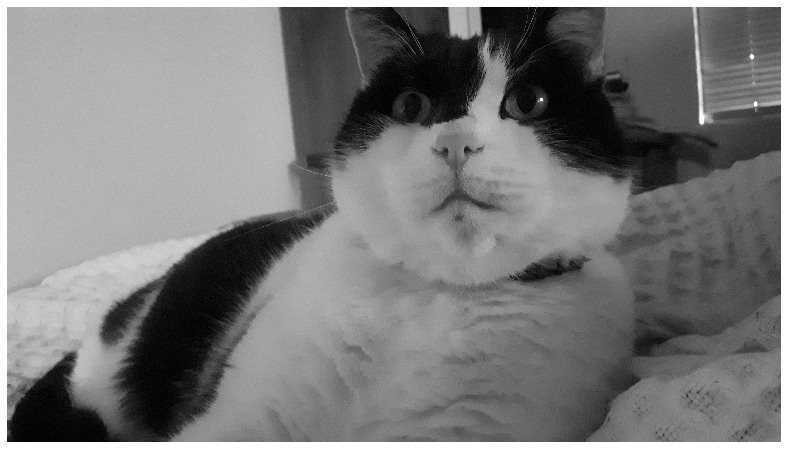

In [202]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]

IMAGE = 'cat.jpg'

A = imread(IMAGE)
X = np.mean(A, -1) # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

<div class="alert alert-block alert-warning">
Let us now take the data from this image, and find it's truncated SVD:

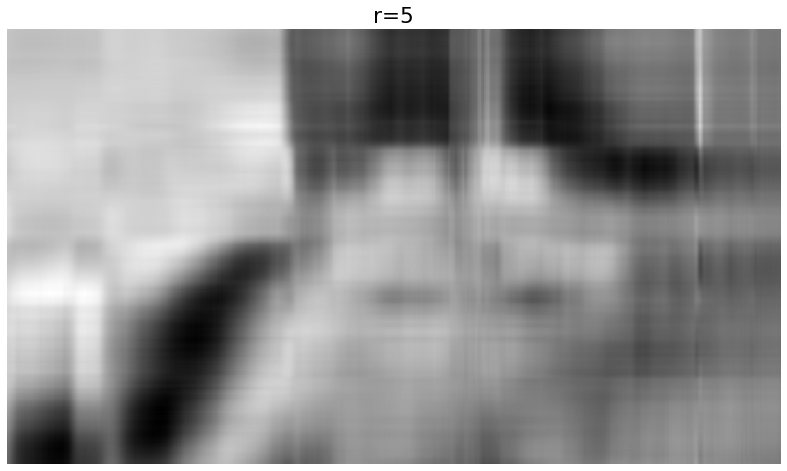

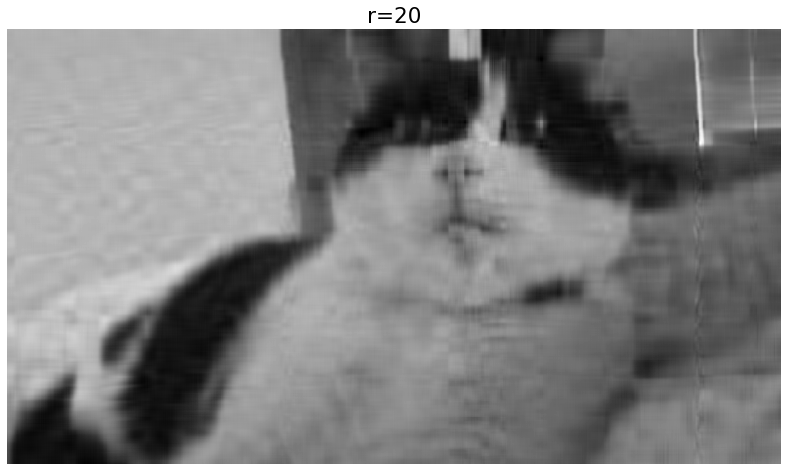

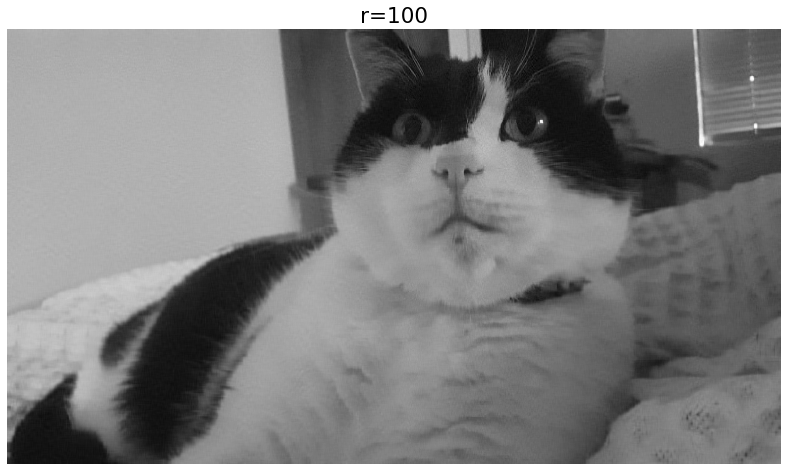

In [203]:
U, S, VT = np.linalg.svd(X, full_matrices=False) # SVD calculation
S = np.diag(S)

j=0

R1 = 5
R2 = 20
R3 = 100

for r in (R1, R2, R3):
    # Construct an approximate image
    Xapprox = U[:,:r] @ S[0:r, :r] @ VT[:r,:] # @ is a matrix-multiplication operator - dependencies on numpy
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r=' + str(r), color='k')
    plt.show()
    
# This may take a few seconds

<div class="alert alert-block alert-warning">
    It's not bad at all. We can see at $r=5$ it is wholly underdetermined as to what the image represents, although there are certain marked features that we can regonise from the original. $r=20$ gives us a very good approximation, despite the scarcity of eigenimages represented, though it is still blocky the original image is easily identifiable. At $r=100$ the representation is quite imaculate. There are details which one may spot are missing, but one has to search for them.
    
We may further plot the distribution of <b>singular values</b> themselves. Discussed [below](#Optimal-Truncation-for-the-SVD) is an optimal truncation threshold for the SVD. This distribution is useful in finding that optima:

We'll grab the singular values from $S$, which is standing in for $\Sigma$, and extract the diagonal entries only. We will plot these with log scaling on the y-axis (semilog-y), as well as the cumulative sum (cumsum) of the ratio between the singular values, and the trace of the matrix i.e. how much each singular value progresses the compressed image towards likeness with the original:

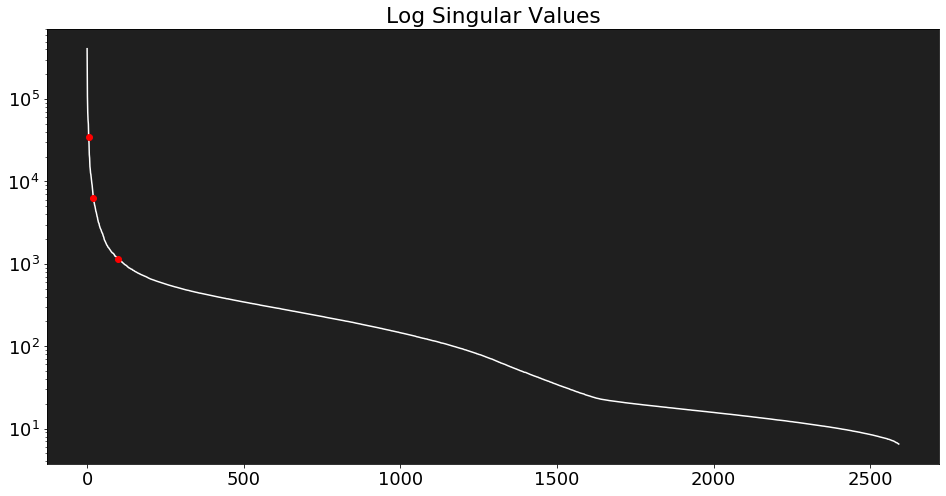

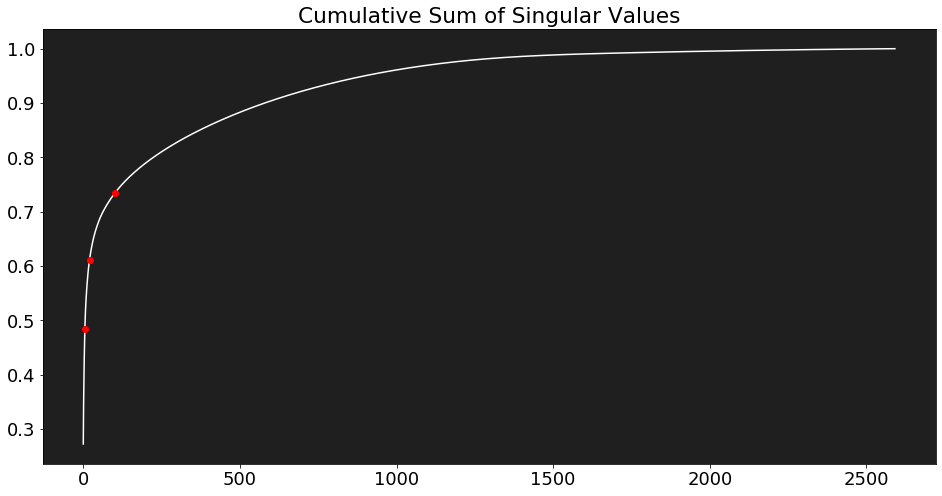

In [204]:
plt.figure(1)
plt.semilogy(np.diag(S), color='w')
plt.plot(5, np.diag(S)[R1], 'ro')
plt.plot(20, np.diag(S)[R2], 'ro')
plt.plot(100, np.diag(S)[R3], 'ro')
plt.title('Log Singular Values', color='k')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S)/np.sum(np.diag(S))), color='w')
plt.plot(5, np.cumsum(np.diag(S)/np.sum(np.diag(S)))[R1], 'ro')
plt.plot(20, np.cumsum(np.diag(S)/np.sum(np.diag(S)))[R2], 'ro')
plt.plot(100, np.cumsum(np.diag(S)/np.sum(np.diag(S)))[R3], 'ro')
plt.title('Cumulative Sum of Singular Values', color='k')
plt.show()

<div class="alert alert-block alert-warning">
    We can see that much of the variance - or 'energy' - is captured in the first couple of Singular Values. I've plotted the values used in the examples above as red dots, to see precisely how much 'energy' each image corresponds to.

<div class="alert alert-block alert-info">
    I'm a little curious what the remaining singular values from the distribution - the noisy distribution - looks like:

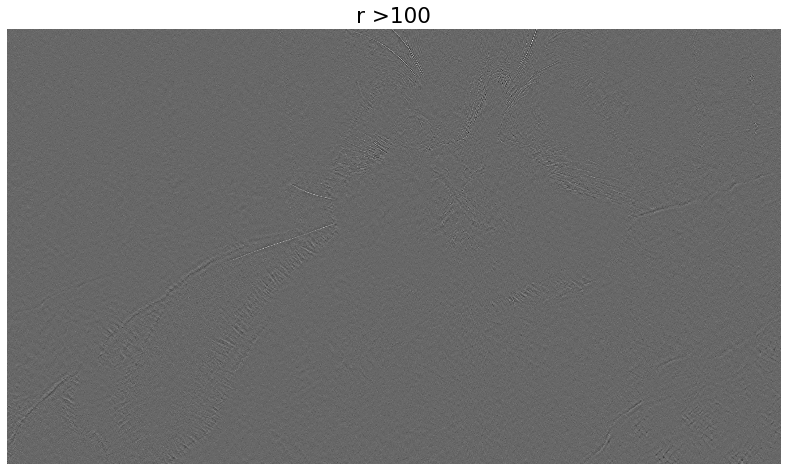

In [253]:
# Visualise the remaining Singular Values

U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)
Xremaining = U[:,R3:] @ S[R3:, R3:] @ VT[R3:,:]
plt.figure(j+1)
j += 1
img = plt.imshow(Xremaining)
img.set_cmap('gray')
plt.axis('off')
plt.title('r >' + str(R3))
plt.show()

### Dominant Correlations

Suppose $\mathbf{X}$ is a tall-skinny matrix - it's vectors have more entries than their number in the matrix. We can find the correlation matrix $\mathbf{X}^T\mathbf{X}$:
$$\mathbf{X}^T\mathbf{X} = 
\begin{bmatrix}
    \vert          & \vert          &        & \vert          \\
    \textbf{x}_1 ^T& \textbf{x}_2 ^T& \cdots & \textbf{x}_m ^T\\
    \vert          & \vert          &        & \vert          \\
\end{bmatrix}
  \begin{bmatrix}
    \text{---}\hspace{-0.2cm} & \textbf{x}_1 & \hspace{-0.2cm}\text{---}       \\
    \text{---}\hspace{-0.2cm} & \textbf{x}_2 & \hspace{-0.2cm}\text{---}        \\
                              & \vdots          &                                  \\
    \text{---}\hspace{-0.2cm} & \textbf{x}_m & \hspace{-0.2cm}\text{---}
  \end{bmatrix}$$
  
$\mathbf{X}^T\mathbf{X}$ is a square-$m \times m$ matrix. We can evaluate this matrix further:
$$\implies
  \begin{bmatrix}
    \textbf{x}_1 ^T\textbf{x}_1 & \textbf{x}_1 ^T\textbf{x}_2 & \cdots & \textbf{x}_1 ^T\textbf{x}_m       \\
    \textbf{x}_2 ^T\textbf{x}_1 & \textbf{x}_2 ^T\textbf{x}_2 & \cdots & \textbf{x}_2 ^T\textbf{x}_m       \\
    \vdots                      & \vdots                      & \ddots & \vdots                             \\
    \textbf{x}_m ^T\textbf{x}_1 & \textbf{x}_m ^T\textbf{x}_2 & \cdots & \textbf{x}_m ^T\textbf{x}_m
  \end{bmatrix}
$$
which should all have scalar entries (we're back to our inner-product now). This matrix should thus be <i>positive semi-definite</i> and have only real non-negative entries.


Let's try and compute the SVD of this correlation matrix:

We can say that:
$$\mathbf{X}^T\mathbf{X} = V \Sigma^T U^T U \Sigma V^T$$
$U$ is orthogonal, so this simplifies to:
$$\mathbf{X}^T\mathbf{X} = V \Sigma^T \mathbb{1} \Sigma V^T$$
$$\implies V \Sigma^T \Sigma V^T$$
and since $\Sigma$ is diagonal, transposing it returns the original matrix, so:
$$\implies V \Sigma^2 V^T$$
Which is basically the expression for the diagonalisation of the matrix $\mathbf{X}^T\mathbf{X}$

This means that for the correlation matrix, $\Sigma^2$ contains all the <b>eigenvalues</b> and $V$ contains all the <b>eigenvectors</b>!

We can better intuitively think of the SVD then as the diagonalisation of the correlation matrix $\mathbf{X}^T\mathbf{X}$, ehrtr $\Sigma$ contains square-rooted eigenvalues for the correlation matrix, and V contains all the eigenvectors for that correlation matrix.

Now to take care of the other way: if we take $\mathbf{X} \mathbf{X}^T$:

$$\mathbf{X}^T\mathbf{X} = U \Sigma^T V^T V \Sigma U^T$$
$$ \begin{align}
&\implies U \Sigma^T \mathbb{1} \Sigma U^T \\
&\implies U \Sigma^T \Sigma U^T \\ 
&\implies U \Sigma^2 U^T
\end{align}$$

Since $\Sigma$ is the same in each case, the eigenvalues for both correlation matrices are the same. It's just the eigenvectors which are now columns of $U$ as opposed to $V$.

In general we don't want to compute the SVD via this method, since $\mathbf{X}^T\mathbf{X}$ is an immense matrix; it's very inefficient and inaccurate.

### SVD Method of Snapshots

Though, there may be times when it's best to compute the SVD for a matrix. In these cases we can use the <i>method of snapshots</i> to calculate the SVD.

<i>Sirovich (1987) invented this method for fluid flow modelling, a year before his "eigenfaces" paper.</i>

If the data for $\mathbf{X}$ is so large, that you cannot store it in memory, then what we can do is use $\mathbf{X}^T\mathbf{X}$ element-wise, adn we can use this to obtain $V,\Sigma$.

Then we can find $U$ by way of:
$$ \begin{align}
\mathbf{X} &= U\Sigma V^T \\
\implies U &= \mathbf{X}V\Sigma ^{-1}
\end{align} $$

### Unitary Transformations and Geometry

To recap, a matrix $U$ is <i>unitary</i> IFF:
$$U^T U = UU^T = \mathbb{1}$$

and for our economy SVD, only $\hat{U}^T \hat{U} = \mathbb{1}$
The geometric interpretation for unitary transformations is that they preserve angles and lengths of vectors i.e. they just rotate vectors.

If we have any two vectors in a vector space $\mathbf{x},\mathbf{y}$ and I take their inner-product $\langle \mathbf{x},\mathbf{y} \rangle$, it's the same as taking a transformation of $\mathbf{x}$ and $\mathbf{y}$ through our unitary matrix before taking the inner-product:
$$\forall \mathbf{x},\mathbf{y} \in \mathbb{R}^n: \langle \mathbf{x},\mathbf{y} \rangle = \langle U \mathbf{x}, U \mathbf{y} \rangle$$

If $\mathbf{X} \in \mathbb{C}^{n\times m}$ however, then instead of taking the transpose, we take the <i>complex-conjurgate transpose</i> $\mathbf{X}^*$, which basically entails taking the <i>complex-conjurgate</i> of every element in our matrix, before then just taking the transpose as normal.

As an example, suppose we have all the possible unit-length vectors in $\mathbb{R}^m$ - in the row-space of $\mathbf{X}$. For each unit-vector $\mathbf{v}$, $\mathbf{X}\mathbf{v}$ maps the sphere to a ellipsoid. The orientation of the ellipsoid is given by the left-singular vectors in the $\Sigma$ part of $\mathbf{X}$.

<div class="alert alert-block alert-warning">
    We may illustrate these Unitary transformations as follows:
    
Let's create three rotation matrices - one for each direction around an axis $(x,y,z)$, and a scaling matrix $\Sigma$, which will only scale up or down the $(x,y,z)$ axes.

In [317]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.facecolor':'#1F1F1F'})

ANGLE1 = np.pi/15
ANGLE2 = -np.pi/9
ANGLE3 = -np.pi/20

SCALE1 = 3
SCALE2 = 1
SCALE3 = 0.5

theta = np.array([ANGLE1, ANGLE2, ANGLE3])
Sigma = np.diag([SCALE1, SCALE2, SCALE3])

# Rotate about the x-axis:
Rx = np.array([[0, 1, 0],
              [0, np.cos(theta[0]), -np.sin(theta[0])],
              [0, np.sin(theta[0]), np.cos(theta[0])]])
              
# Rotate about the y-axis:
Ry = np.array([[np.cos(theta[1]), 0, np.sin(theta[1])],
              [1, 0, 0],
              [-np.sin(theta[1]), 0, np.cos(theta[1])]])
              
# Rotate about the z-axis:
Rz = np.array([[np.cos(theta[2]), -np.sin(theta[2]), 0],
              [np.sin(theta[2]), np.cos(theta[2]), 0],
              [0, 0, 1]])
              
# Rotate and Scale
X = Rz @ Ry @ Rx @ Sigma

<div class="alert alert-block alert-warning">
    Alternatively, we can define $\mathbf{X}$ in terms of the SVD: 
    
Execute <i>either</i> the cell above or cell below, as well as the cell below that to get the plot of either the manually defined unitary matrix, or the SVD respectively.

In [315]:
# SVD:
U, S, VT = np.linalg.svd(X, full_matrices=False)
X = U @ np.diag(S)

<div class="alert alert-block alert-warning">
    This will give us our Unitary Transformation $\mathbf{X}$. Next we can draw the 3-sphere prior to transformation, apply the transformation $\mathbf{X}$, which will rotate and "smoosh" it along each axis, and plot the resultant ellipsoid post-transform.

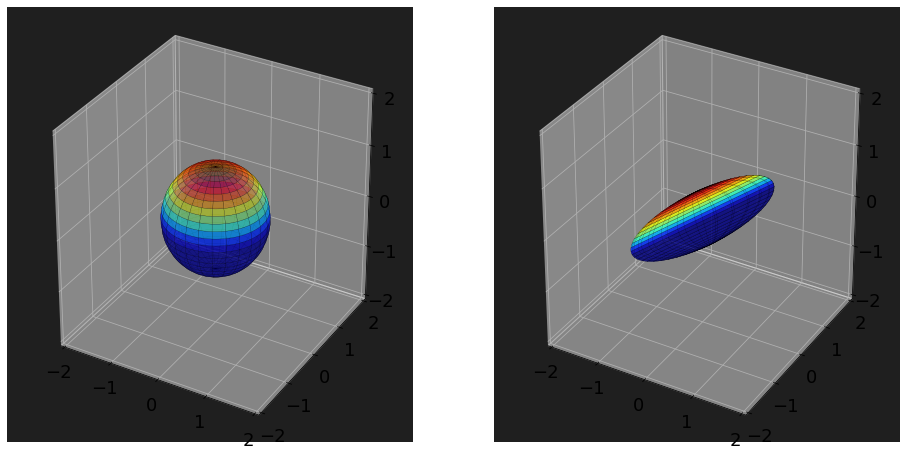

In [318]:
# Sphere Plot:

fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
u = np.linspace(-np.pi, np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Surface Plot:
surf1 = ax1.plot_surface(x, y, z, cmap='jet', alpha=0.6, linewidth=0.2, facecolors=plt.cm.jet(z), rcount=30, ccount=30) 
surf1.set_edgecolor('k')
ax1.set_xlim3d(-2, 2)
ax1.set_ylim3d(-2, 2)
ax1.set_zlim3d(-2, 2)

xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        vec = [x[i,j], y[i,j], z[i,j]]
        vecR = X @ vec
        xR[i,j] = vecR[0]
        yR[i,j] = vecR[1]
        zR[i,j] = vecR[2]
        
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(xR, yR, zR, cmap='jet', alpha=0.6, linewidth=0.2, facecolors=plt.cm.jet(z), rcount=30, ccount=30)
surf2.set_edgecolor('k')
ax2.set_xlim3d(-2, 2)
ax2.set_ylim3d(-2, 2)
ax2.set_zlim3d(-2, 2)
plt.show()

### Least Squares, Regression, and the Pseudo-inverse

A review of linear systems of equations: the form
$$\mathbf{A} \mathbf{x} = \mathbf{b}$$
is a linear system of equations.

The SVD will let us generalise this form to non-square $\mathbf{A}$ matrices. We can have one of three situations:

#### Underdetermined:

$n < m$; short-fat matrices
$$ A = 
\begin{bmatrix}
    \vert          & \vert          &        & \vert          \\
    \textbf{x}_1 & \textbf{x}_2& \cdots & \textbf{x}_m\\
    \vert          & \vert          &        & \vert          \\
\end{bmatrix}
$$

So named, because there are not enough measurements in $\mathbf{b}$ to determine a single solution $\mathbf{x}$

There are $\infty$ number of solutions $\mathbf{x}$ to the system $\mathbf{A} \mathbf{x} = \mathbf{b}$


#### Overdetermined:

$n > m$; tall-skinny matrices
$$ A = 
\begin{bmatrix}
    \vert          &        \\
    \textbf{x}_1   & \cdots \\
    \vert          &            \\
\end{bmatrix}
$$

Here the $\mathbf{A}$ matrix just produces too many equations, such that the $\mathbf{x}$ solution cannot satisfy all of them.

There are no solutions to the system $\mathbf{x}$ to the system $\mathbf{A} \mathbf{x} = \mathbf{b}$

However, with the SVD we can solve these aformentioned cases. For some matrix $\mathbf{A}$ which has an economy SVD of:
$$\mathbf{A} = U \Sigma V^T$$

We can define something called the <b>Moore-Penrose Pseudo-inverse</b> of $\mathbf{A}$, or shortened to just the "Pseudo-inverse" as the following:

For some $$\mathbf{A} \mathbf{x} = \mathbf{b}$$
we can rewrite:
$$ U \Sigma V^T\mathbf{x} = \mathbf{b}$$

Now, to solve for $\mathbf{x}$
$$ U^T U \Sigma V^T\mathbf{x} = U^T \mathbf{b} \implies \mathbb{1} \Sigma V^T\mathbf{x} = U^T \mathbf{b}$$
$$\implies \Sigma ^{-1}\Sigma V^T\mathbf{x} = \Sigma ^{-1} U^T \mathbf{b} \implies V^T\mathbf{x} = \Sigma ^{-1} U^T \mathbf{b}$$
$$\implies V V^T\mathbf{x} = V \Sigma ^{-1} U^T \mathbf{b} \implies \mathbf{x} = V \Sigma ^{-1} U^T \mathbf{b}$$

We define this matrix, that when left-multiplied by $\mathbf{b}$ returns our solution, as the pseudo-inverse
$$\implies \mathbf{A}^\dagger = V \Sigma ^{-1} U^T$$

A genuine inverse cannot be obtained for $\mathbf{A}$ since it's not square, but this satisfies some of the properties of invertibility, that will allow us to solve for $\mathbf{x}$

However, among possible ways of defining an inverse for $\mathbf{A}$, this pseudo-inverse will yield a solution that has the minimum 2-norm:

$$\mathrm{min}\|\tilde{\mathbf{x}}\|_2 s.t. \mathbf{A} \mathbf{x} = \mathbf{b}$$

and in the overdetermined case, it minimises the 2-norm of $\mathbf{A} \mathbf{x} = \mathbf{b}$

$$\mathrm{min}\|\mathbf{A}\tilde{\mathbf{x}}-\mathbf{b}\|_2 s.t. \mathbf{A} \mathbf{x} = \mathbf{b}$$
i.e. it gives the <b>least-squares solution</b>.

In our <b>overdetermined</b> case, if we try to solve $\mathbf{A} \mathbf{x} = \mathbf{b}$ with $\mathbf{A}^\dagger \mathbf{b}$, we find:

$$ U \Sigma V^T V \Sigma ^{-1} U^T \mathbf{b} = UU^T \mathbf{b}$$

Which is <i>not</i> $\mathbf{b}$. Remember: we are using the "economy" SVD in doing the pseudo-inverse, and there $U$ is <i>not orthogonal</i>.

We should interpret $UU^T \mathbf{b}$ as the projection of $\mathbf{b}$ onto the span of the columns of $U$ i.e. $\mathrm{span}\{U\}$, which should  be the same as $\mathrm{span}\{A\}$.

This makes sense, since if you're going to solve $\mathbf{A} \mathbf{x} = \mathbf{b}$, the only way you can do it is if $\mathbf{b}$ is in the columnspace of $\mathbf{A}$ - since the way we actually solve these is by taking linear combinations of the columns of $\mathbf{A}$. 

The best we can thus do is if we project the solution onto the surface spanned by the column-space i.e. if we project $\mathbf{b}$ onto a space in which there are possible solutions to $\mathbf{A} \mathbf{x} = \mathbf{b}$

### Linear Systems of Equations

For a linear system of equations
$$\mathbf{A} \mathbf{x} = \mathbf{b}$$

A solution to this system only exists if $\mathbf{b}$ is in the column-space of $\mathbf{A}$. We should keep in mind the geometry of the situation: when we solve a system like this, what we're doing is adding up the columns of $\mathbf{A}$ some $x_i$ times to obtain $\mathbf{b}$, so if there's no way to do that then there is no solution to the system.

There are highly "degenerate" matrices however, that deviate from the common form of underdetermined and overdetermined matrices, that have either no solutions or $\infty$ solutions respectively.

e.g. where $\mathbf{A} = \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$ and  $\mathbf{b} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$, there is no $\mathbf{x}$ that can solve this system, even though there is more columns than rows. This is because the <i>span</i> of the column-space is only in one direction, which happens not to be paralell with $\mathbf{b}$.

For the overdetermined case, where there are more rows than columns, if $\mathbf{b}$ happens to be in the column-space of $\mathbf{A}$ we will be able to solve that system, even though this form has no guarantee of having a solution for any $\mathbf{A}, \mathbf{b}$.

We write the column-space as:
$$\mathrm{col}(\mathbf{A})$$

The column space of $\mathbf{A}$ and $\mathbf{U}$ are the same by construction - since each $\mathbf{u}$ needs to be a solution to $\mathbf{A} \mathbf{u} = \sigma \mathbf{v}$:

$$\mathrm{col}(\mathbf{A}) = \mathrm{col}(\hat{\mathbf{U}})$$

This is known as the <b>range</b>

The Kernel of the transpose of $\mathbf{A}$, or the null-space of $\mathbf{A} ^T$, denoted by:
$$\mathrm{ker}(\mathbf{A}^T)$$
is the <b>orthogonal compliment</b> of the columnspace $\mathrm{col}(\mathbf{A})$. This is given by the solutions to the system:
$$\mathbf{A}^T \mathbf{x} = \mathbf{0}$$

To review:

 - $\mathrm{col}(\mathbf{A})$ is given by the solutions to $\mathbf{A} \mathbf{x} = \mathbf{b}$
 - $\mathrm{ker}(\mathbf{A}^T)$ is given by the solutions to $\mathbf{A}^T \mathbf{x} = \mathbf{0}$
 
<div class="alert alert-block alert-info">

#### Proof of the Orthogonal Complement to the Column-space:

$\mathbf{A}^T \mathbf{x} = \mathbf{0}$ is only solved when the dot-product of every column-vector in $\mathbf{A}$ with the solution $\mathbf{x}$ yields $0$. This is only possible when $\mathbf{x}$ is orthogonal to every column in $\mathbf{A}$.


If it's orthogonal to every column of $\mathbf{A}$ it must also be orthogonal to all linear combinations of the columns of $\mathbf{A}$ i.e. it must be orthogonal to $\mathrm{col}(\mathbf{A})$, and this is true of every solution to $\mathrm{ker}(\mathbf{A}^T)$.

These spaces combined will span all of $\mathbb{R}^n$ i.e.
$$\mathrm{span}\{\mathrm{col}(\mathbf{A}) \cup \mathrm{ker}(\mathbf{A}^T)\} = \mathbb{R}^n$$

</div class="alert alert-block alert-info">

We also have the <b>row-space</b> of $\mathbf{A}$ which corresponds to the span of all the row-vectors of $\mathbf{A}$, notated as:
$$\mathrm{row}(\mathbf{A})$$
and the <b>kernel</b> or <b>null-space</b> of $\mathbf{A}$ which are the solutions to $\mathbf{A} \mathbf{x} = \mathbf{0}$, notated as:
$$\mathrm{ker}(\mathbf{A})$$
i.e.:

 - $\mathrm{row}(\mathbf{A})$ is given by the solutions to $\mathbf{A}^T \mathbf{x} = \mathbf{b}$
 - $\mathrm{ker}(\mathbf{A})$ is given by the solutions to $\mathbf{A} \mathbf{x} = \mathbf{0}$
 
The row-space is also, by like reasoning to the column-space, equal to the row-space of $V$ i.e. the column-space of $V^T$:
$$\mathrm{row}(\mathbf{A}) = \mathrm{col}(V^T)$$

We know that for
$$\mathbf{A} \mathbf{x} = \mathbf{b}$$

If we want an exact solution to this system of linear equations, $\mathbf{b}$ needs to be in the column-space of $\mathbf{A}$.
If we want an $\infty$ number of solutions to this system of linear equations, there needs to be some vectors possible that map to $\mathbf{0}$ - the dimension of the kernel of $\mathbf{A}$ needs to be non-zero
$$\mathrm{dim}(\mathrm{ker}(\mathbf{A})) \neq 0$$
You can see this since if we have a $\mathbf{x}_{null} \in \mathrm{ker}(\mathbf{A})$, and we have an "exact" solution $\mathbf{x}$, then plugging the sum of these solutions we get:
$$\mathbf{A}(\mathbf{x} + \mathbf{x}_{null}) = \mathbf{A}\mathbf{x} + \mathbf{A}\mathbf{x}_{null} = \mathbf{b} + \mathbf{0} = \mathbf{b}$$
which is a solution, so we have a number of solutions correpsondent to the size of the kernel - which is infinite, since the kernel forms a subspace (scaling solutions up by multiplying by a scalar is also a solution).

### Linear Regression

Now we can use
$$\mathbf{A} \mathbf{x} = \mathbf{b}$$
for regression. Suppose each row corresponded to an individual being sampled, and they were measured along certain fields that corresponded to the columns of $\mathbf{A}$, to predict some other parameter for that individual in $\mathbf{b}$. The solution $\mathbf{x}$ here corresponds to a predictive model from the data.

Supposing we have data for some number of individuals in $\mathbf{a}$ and the output of that data in $\mathbf{b}$.
$$\mathbf{a} = \begin{bmatrix} a_1 \\ a_2 \\ a_3 \\ \vdots \end{bmatrix} , \mathbf{b} = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \\ \vdots \end{bmatrix}$$

Where pairs $(a_i, b_i)$ correspond to a data-point on the plane.

This is a one-dimensional case. The SVD of this will look like

$$U = \frac{\mathbf{a}}{\|\mathbf{a}\|_2}$$

$$\Sigma = \|\mathbf{a}\|_2$$

$$V = 1$$

Since we know
$$\mathbf{A}^\dagger = V \Sigma ^{-1} U^T$$

We can find our pseudo-inverse:
$$\implies \mathbf{A}^\dagger = 1 \cdot \|\mathbf{a}\|_2 ^{-1} \frac{\mathbf{a}}{\|\mathbf{a}\|_2}^T$$
$$\implies \mathbf{A}^\dagger = \frac{1}{\|\mathbf{a}\|_2} \frac{1}{\|\mathbf{a}\|_2}\mathbf{a}^T$$
$$\implies \mathbf{A}^\dagger = \frac{\mathbf{a}^T}{\|\mathbf{a}\|_2 ^2}$$

So solving for 
$$\mathbf{x} = \mathbf{A} ^\dagger \mathbf{b}$$
$$\implies \mathbf{x} = \frac{\mathbf{a}^T \mathbf{b}}{\|\mathbf{a}\|_2 ^2}$$

This makes sense given that the numerator here is the projection (scalar product) of $\mathbf{b}$ onto $\mathbf{a}$, and the denomenator scales both vectors to be unit length.

One of the big issues with linear regression is that it's very sensitive to large outliers, since if the distance to the line of best fit is great, the regression will try to severely correct as it minimises the square of the distance. This is why it's very important that the data has a Gaussian distribution. We can offset this issue by introducting a cost in terms of the $L_1$ norm.

<div class="alert alert-block alert-warning">
    Let's plot a randomised dataset which we can control the true population parameters:

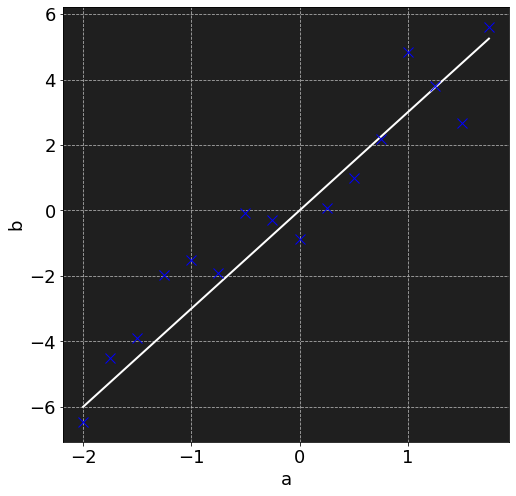

In [277]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})
plt.rcParams["text.color"] = 'w'
plt.rcParams.update({'axes.facecolor':'#1F1F1F'})

# True population params.
x = 3
a = np.arange(-2,2,0.25)
a = a.reshape(-1, 1)
b = x*a + np.random.randn(*a.shape) # xa + noise

plt.plot(a, x*a, Color='white', LineWidth=2, label='True Population Statistic')
plt.plot(a, b, 'x', Color='blue', MarkerSize=10, Label='Noisy Data')

plt.xlabel('a')
plt.ylabel('b')

plt.grid(linestyle='--')
plt.show()

<div class="alert alert-block alert-warning">
    Let's now try do linear regression on this data using the SVD:

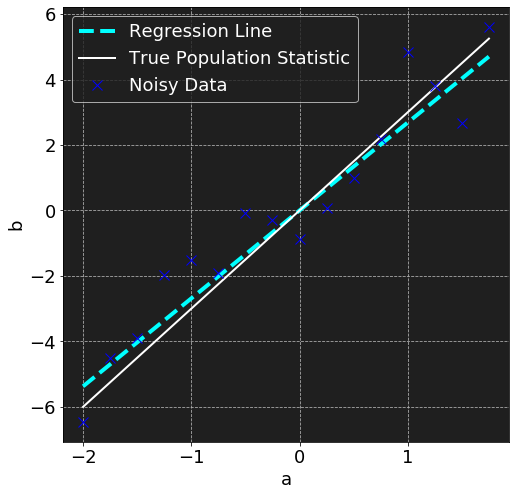

In [278]:
U, S, VT = np.linalg.svd(a,full_matrices=False)
# Finding the Pseudoinverse @ b:
xtilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

plt.plot(a,xtilde * a,  '--', Color='aqua', LineWidth=4, label='Regression Line')
plt.plot(a, x*a, Color='white', LineWidth=2, label='True Population Statistic')
plt.plot(a, b, 'x', Color='blue', MarkerSize=10, Label='Noisy Data')

plt.xlabel('a')
plt.ylabel('b')

plt.grid(linestyle='--')
plt.legend()
plt.show()

<div class="alert alert-block alert-warning">
    As we can see the SVD is able to predict our population parameters extremely well.
    
Alternatively, one can use:

In [124]:
xtilde = np.linalg.pinv(a)

<div class="alert alert-block alert-warning">
    To calculate the <i>pseudo-inverse</i>.

<div class="alert alert-block alert-warning">
Let's examine a different dataset where we do not know the true population parameters - Portland Cement Heat. This dataset is a series of 13 experiments where cement is mixed together, and the heat generated is measured and recorded. There are 4 ingredients used in the cement-mixing, whose proportions are recorded for each experiment in an $\mathbf{A}$ matrix, and the heat generated is recorded in a $\mathbf{b}$ matrix.

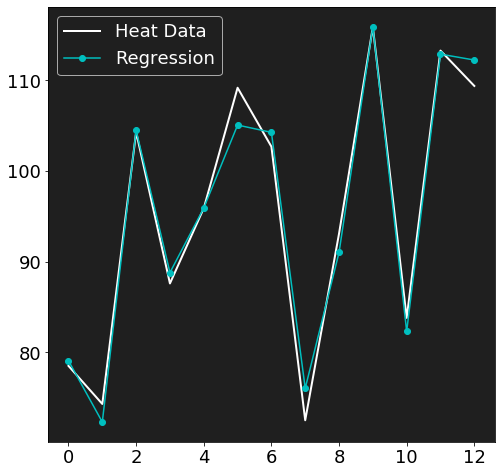

In [279]:
import matplotlib.pyplot as plt
import numpy as np
import os
import subprocess
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.facecolor':'#1F1F1F'})

# Port dataset
if 'DATA' not in os.listdir():
    # os.mkdir('DATA')
    repo = "https://code.ewota.com/share/Data_Driven_Science_Python_Demos.git"
    os.system("start /B start cmd.exe @cmd /k {cd "+ os.getcwd() + " && git clone " + repo + " DATA}")
else:
    pass

# Load dataset
A = np.loadtxt(os.path.join(os.getcwd(), 'DATA', 'DATA', 'hald_ingredients.csv'), delimiter=',')
b = np.loadtxt(os.path.join(os.getcwd(), 'DATA', 'DATA', 'hald_heat.csv'), delimiter=',')

# Solve Ax = b using the SVD:
U, S, VT = np.linalg.svd(A,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

plt.plot(b, color='w', linewidth=2, label='Heat Data') # True relationship
plt.plot(A@x, '-o', color='c', linewidth=1.5, markersize=6, label='Regression')
plt.legend()
plt.show()

<div class="alert alert-block alert-warning">
    Here we have $\mathbf{A}$ and $\mathbf{b}$ known. We calculate the pseudo-inverse (called $x$ here) using $\mathbf{b}$ and multiply it by $\mathbf{A}$. We can see that the predicted $\mathbf{b}$ correlates well with the actual $\mathbf{b}$, but does not predict it perfectly.

Remember: The pseudo-inverse is a model of the closest solution to the $\mathbf{A}$ matrix. The blue line does not show the pseudo-inverse, but what $\mathbf{b}$ would be if it was solved by the pseudo-inverse.

In general, it is usually a bad idea to fit a model to the data whole-sale, since there is a danger of overfitting - meaning the error of your predictions will be large as your model also predicts for random noise as though it isn't random noise. What you want to do is partition your data into a "training set" and a "holdout set" so that you build your model on the training set, and test it on your holdout set.

<div class="alert alert-block alert-warning">
    Finally we'll examine the Boston housing market data. This data contains a $\mathbf{b}$ vector of the final house price, while $\mathbf{A}$ contains other incidental data, pertaining to things like it's location, the density of the population, proximity to school, etc. numbering up to 13 features (columns) and 506 houses (rows). We can use the pseudo-inverse to create a model $\mathbf{x}$ of how the features relate to the final price.
    
Further, we will also insert an extra column of ones on the left side of the $\mathbf{A}$ matrix, so that the model can be given the opportunity to predict the mean house price in our linear regression.

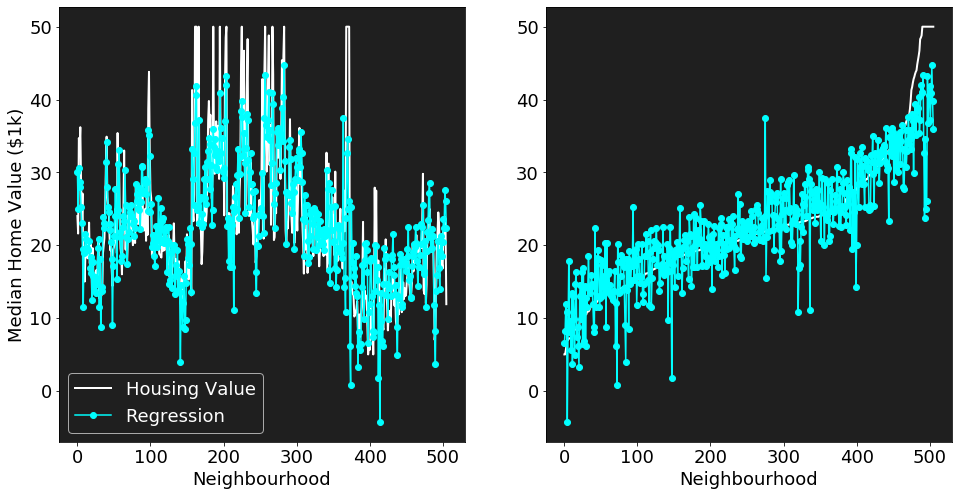

In [280]:
import matplotlib.pyplot as plt
import numpy as np
import os
import subprocess
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.facecolor':'#1F1F1F'})

# Port dataset
if 'DATA' not in os.listdir():
    # os.mkdir('DATA')
    repo = "https://code.ewota.com/share/Data_Driven_Science_Python_Demos.git"
    os.system("start /B start cmd.exe @cmd /k {cd "+ os.getcwd() + " && git clone " + repo + " DATA}")
else:
    pass

# Load Dataset
H =  np.loadtxt(os.path.join(os.getcwd(), 'DATA', 'DATA', 'housing.data'))
b = H[:,-1]   # Housing values within $1 000
A = H[:,:-1]  # Other factors

# Pad with ones for non-zero mean
A = np.pad(A,[(0,0),(0,1)], mode='constant', constant_values=1)

# SVD calc.
U, S, VT = np.linalg.svd(A, full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(b, Color='white', LineWidth=2, label='Housing Value') # True relation
plt.plot(A@x, '-o', Color='cyan', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('Neighbourhood')
plt.ylabel('Median Home Value ($1k)')
plt.legend()

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:,-1])
b = b[sort_ind] # sorted values
plt.plot(b, Color='white', LineWidth=2, label='Housing Value')
plt.plot(A[sort_ind,:]@x, '-o', Color='cyan', LineWidth=1.5, MarkerSize=6, label="Regression")
plt.xlabel("Neighbourhood")

plt.show()

<div class="alert alert-block alert-warning">
Let's examine the relative values of the features in our model $\mathbf{x}$:

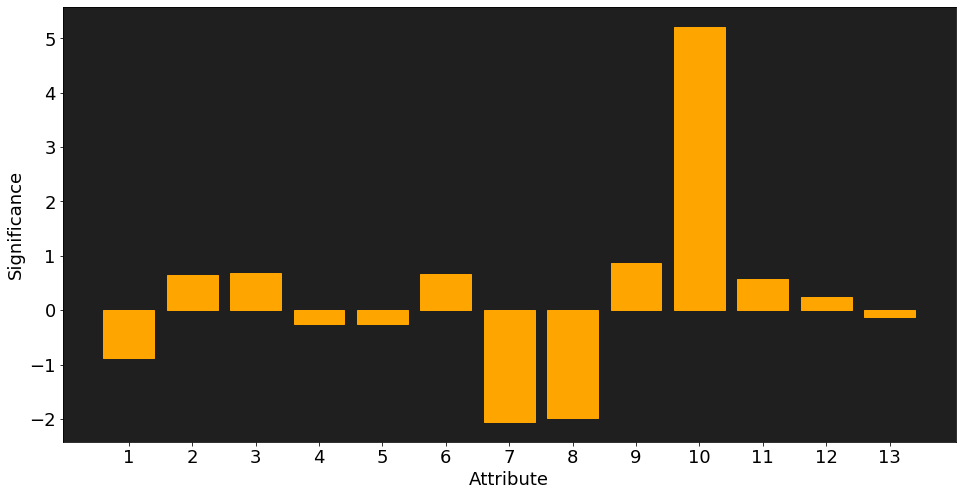

In [272]:
A_mean = np.mean(A,axis=0)
A_mean = A_mean.reshape(-1, 1)

A2 = A - np.ones((A.shape[0],1)) @ A_mean.T # take away all the ones we added before for std dev. calc.

for j in range(A.shape[1]-1):
    A2std = np.std(A2[:,j])
    A2[:,j] = A2[:,j]/A2std

A2[:,-1] = np.ones(A.shape[0])

U, S, VT = np.linalg.svd(A2,full_matrices=False)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
x_tick = range(len(x)-1)+np.ones(len(x)-1)
plt.bar(x_tick,x[:-1], Color='orange')
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()

<div class="alert alert-block alert-warning">
We can see now plotting the $\mathbf{x}$ model, that factor 10 is extremely significant, by about 5 standard deviations, and positively contributes to house prices. Similarly, factors 7 and 8 correlate strongly, by 2 standard deviations, but negatively impact housing prices.

<div class="alert alert-block alert-warning">
Let's now train our model on only half the dataset instead of the whole data-set, to avoid overfitting:

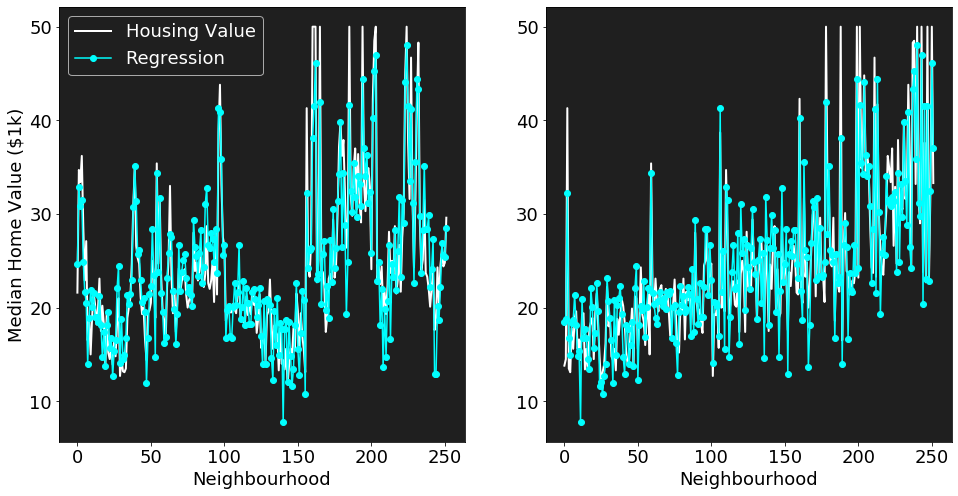

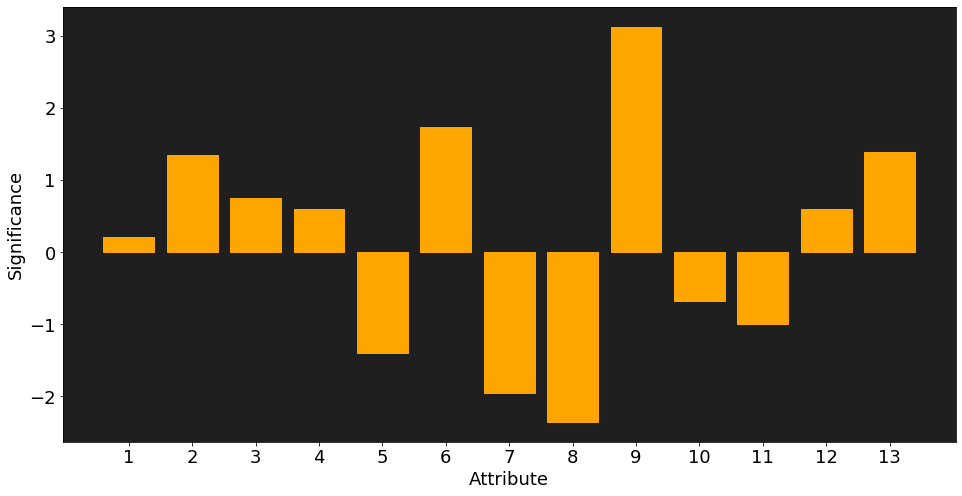

In [281]:
import matplotlib.pyplot as plt
import numpy as np
import os
import subprocess
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.facecolor':'#1F1F1F'})

# Port dataset
if 'DATA' not in os.listdir():
    # os.mkdir('DATA')
    repo = "https://code.ewota.com/share/Data_Driven_Science_Python_Demos.git"
    os.system("start /B start cmd.exe @cmd /k {cd "+ os.getcwd() + " && git clone " + repo + " DATA}")
else:
    pass

# Load Dataset
H = np.loadtxt(os.path.join(os.getcwd(), 'DATA', 'DATA', 'housing.data'))
b = H[:,-1]   # Housing values within $1 000
A = H[:,:-1]  # Other factors

# Pad with ones for non-zero mean
A = np.pad(A,[(0,0),(0,1)], mode='constant', constant_values=1)


PERCENTAGE_TRAINED = 50

n = int(len(A[:,0]) * (PERCENTAGE_TRAINED / 100))

btrain = b[1:n]
Atrain = A[1:n]
btest = b[n:]
Atest = A[n:]


# SVD calc.
U, S, VT = np.linalg.svd(Atrain, full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain

fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(btrain, Color='w', LineWidth=2, label='Housing Value') # True relation
plt.plot(Atrain@x, '-o', Color='cyan', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('Neighbourhood')
plt.ylabel('Median Home Value ($1k)')
plt.legend()

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:n-1,-1])
btrain = btrain[sort_ind] # sorted values
plt.plot(btrain, Color='w', LineWidth=2, label='Housing Value')
plt.plot(Atrain[sort_ind,:]@x, '-o', Color='cyan', LineWidth=1.5, MarkerSize=6, label="Regression")
plt.xlabel("Neighbourhood")

plt.show()

A_mean = np.mean(Atrain,axis=0)
A_mean = A_mean.reshape(-1, 1)

A2 = Atrain - np.ones((Atrain.shape[0],1)) @ A_mean.T # take away all the ones we added before for std dev. calc.

for j in range(A.shape[1]-1):
    A2std = np.std(A2[:,j])
    A2[:,j] = A2[:,j]/A2std

A2[:,-1] = np.ones(Atrain.shape[0])



U, S, VT = np.linalg.svd(A2,full_matrices=False)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain
x_tick = range(len(x)-1)+np.ones(len(x)-1)
plt.bar(x_tick,x[:-1], Color='orange')
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()

<div class="alert alert-block alert-warning">
    Naturally, we find that our model doesn't do as well a job now at fitting the data, and our factors are more variable. Our issue can also be a data-cleaning problem: there may be an implicit ordering/grouping of neighbourhoods in our data, which is affecting our model unbenownst to us (which isn't represented by any of these factors). We may circumvent this issue by taking <i>random</i> samples from our initial data-matrix, so there is no ordering.
    
Let's try this:

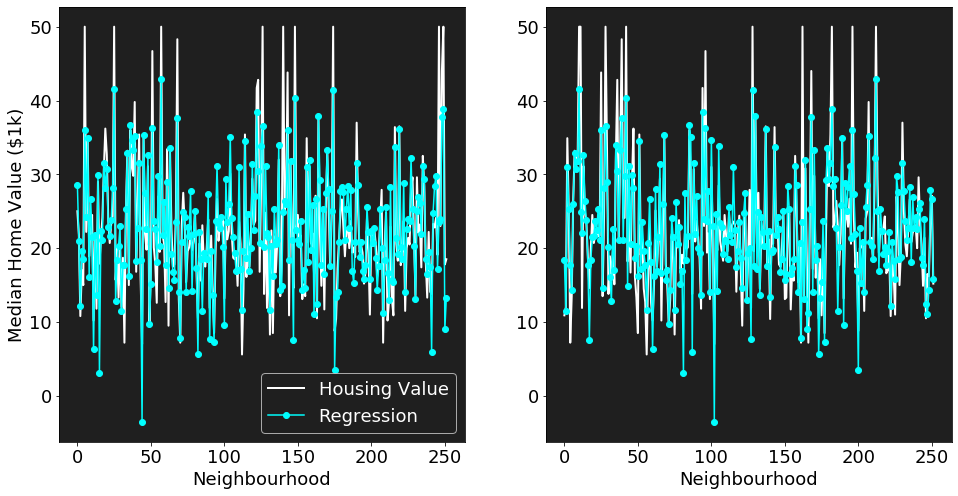

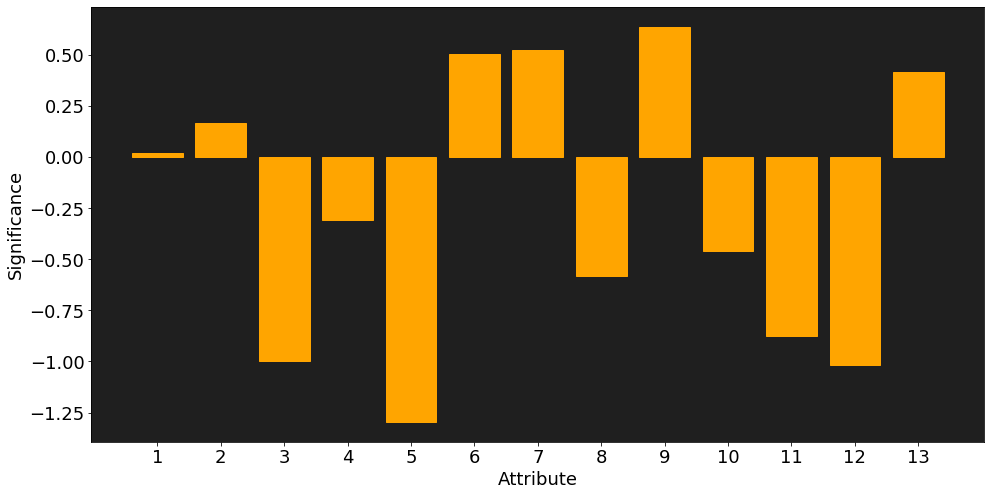

In [282]:
import matplotlib.pyplot as plt
import numpy as np
import os
import subprocess
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.facecolor':'#1F1F1F'})

# Port dataset
if 'DATA' not in os.listdir():
    # os.mkdir('DATA')
    repo = "https://code.ewota.com/share/Data_Driven_Science_Python_Demos.git"
    os.system("start /B start cmd.exe @cmd /k {cd "+ os.getcwd() + " && git clone " + repo + " DATA}")
else:
    pass

# Load Dataset
H = np.loadtxt(os.path.join(os.getcwd(), 'DATA', 'DATA', 'housing.data'))
b = H[:,-1]   # Housing values within $1 000
A = H[:,:-1]  # Other factors

# Pad with ones for non-zero mean
A = np.pad(A,[(0,0),(0,1)], mode='constant', constant_values=1)


PERCENTAGE_TRAINED = 50

n = int(len(A[:,0]) * (PERCENTAGE_TRAINED / 100))
p = np.random.permutation(506)
A = A[p,:]
b = b[p]

btrain = b[1:n]
Atrain = A[1:n]
btest = b[n:]
Atest = A[n:]


# SVD calc.
U, S, VT = np.linalg.svd(Atrain, full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain

fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(btrain, Color='w', LineWidth=2, label='Housing Value') # True relation
plt.plot(Atrain@x, '-o', Color='cyan', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('Neighbourhood')
plt.ylabel('Median Home Value ($1k)')
plt.legend()

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:n-1,-1])
btrain = btrain[sort_ind] # sorted values
plt.plot(btrain, Color='w', LineWidth=2, label='Housing Value')
plt.plot(Atrain[sort_ind,:]@x, '-o', Color='cyan', LineWidth=1.5, MarkerSize=6, label="Regression")
plt.xlabel("Neighbourhood")

plt.show()

A_mean = np.mean(Atrain,axis=0)
A_mean = A_mean.reshape(-1, 1)

A2 = Atrain - np.ones((Atrain.shape[0],1)) @ A_mean.T # take away all the ones we added before for std dev. calc.

for j in range(A.shape[1]-1):
    A2std = np.std(A2[:,j])
    A2[:,j] = A2[:,j]/A2std

A2[:,-1] = np.ones(Atrain.shape[0])



U, S, VT = np.linalg.svd(A2,full_matrices=False)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ btrain
x_tick = range(len(x)-1)+np.ones(len(x)-1)
plt.bar(x_tick,x[:-1], Color='orange')
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()

<div class="alert alert-block alert-warning">
    <b>Much better!</b> Notice our model now is completely different, which means the implicit ordering was driving much of the variance.

### Principal Component Analysis

What we've been discussing is a statistical interpretation of the SVD. We may use the SVD to obtain a hierarchical coordinate system from data, such that we maximally capture the variance in the data.

Suppose we have a series of measurements from independent experiments, which we represent as row-vectors in a data-matrix $\mathbf{X}$.

$$\mathbf{X} = 
  \begin{bmatrix}
    \text{---}\hspace{-0.2cm} & \textbf{x}_1 & \hspace{-0.2cm}\text{---}       \\
    \text{---}\hspace{-0.2cm} & \textbf{x}_2 & \hspace{-0.2cm}\text{---}       \\
                              & \vdots          &                              \\
    \text{---}\hspace{-0.2cm} & \textbf{x}_n & \hspace{-0.2cm}\text{---}
  \end{bmatrix}$$
  
We will use rows as the convention here, instead of columns, but these row-vectors would be column-vectors above.

Let's assume that $\mathbf{X}$ has some statistical distribution. We may calculate the mean row:
$$\bar{\mathbf{x}} = \frac{1}{n}\sum_{j=1}^{n}\mathbf{x}_j$$

and calculate the <i>mean matrix</i> by taking the outer product of the mean vector with a column-vector of ones:
$$\bar{\mathbf{X}} = \begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix} \bar{\mathbf{x}}$$

$$ \implies \bar{\mathbf{X}} = 
  \begin{bmatrix}
    \text{---}\hspace{-0.2cm} & \bar{\mathbf{x}} & \hspace{-0.2cm}\text{---}       \\
    \text{---}\hspace{-0.2cm} & \bar{\mathbf{x}} & \hspace{-0.2cm}\text{---}       \\
                              & \vdots          &                              \\
    \text{---}\hspace{-0.2cm} & \bar{\mathbf{x}} & \hspace{-0.2cm}\text{---}
  \end{bmatrix}$$
  
and subtract this from our original data-matrix. This will have the effect of giving each row the form $\mathbf{x}_j - \bar{\mathbf{x}}$.

$$\mathbf{B} = \mathbf{X} - \bar{\mathbf{X}} =
\begin{bmatrix}
    \text{---}\hspace{-0.2cm} & \mathbf{x}_1-\bar{\mathbf{x}} & \hspace{-0.2cm}\text{---}       \\
    \text{---}\hspace{-0.2cm} & \mathbf{x}_2-\bar{\mathbf{x}} & \hspace{-0.2cm}\text{---}       \\
                              & \vdots          &                              \\
    \text{---}\hspace{-0.2cm} & \mathbf{x}_n-\bar{\mathbf{x}} & \hspace{-0.2cm}\text{---}
\end{bmatrix}$$

This is called the <b>mean-centred data-matrix</b>.

Next, we can calculate the <i>correlation</i> matrix, called the <b>covariance</b> matrix in this context:
$$C = \mathbf{B}^T \mathbf{B}$$
and calculate it's diagonalisation:
$$CV = V\Lambda$$
where $V$ will contain information about the eigenvectors of $C$ and $\Lambda$ contains all the eigenvalues. Multiplying the mean-centred matrix with the eigenvector matrix for $C$:
$$\mathbf{T} = \mathbf{B} V$$
We obtain the <b>principal components</b> of our data-matrix $\mathbf{X}$. The eigenvector matrix $V$ contains what are called the <b>loadings</b> of $\mathbf{X}$, which basically refer to how much of the principal components each independent experiment $\mathbf{x}$ has.

#### Alternatively:
If we take the SVD of the mean-centred matrix $\mathbf{B}$, such that:
$$\mathbf{B} = U \Sigma V^T$$
The matrix $V$ here is given by the eigenvectors of $\mathbf{B}^T \mathbf{B}$ i.e. the eigenvectors of $C$, so the $V$ matrix is indeed the same $V$ matrix from the SVD.

If we now substitute the SVD of $\mathbf{B}$ into our principal components:
$$\mathbf{T} = \mathbf{B} V = U \Sigma V^T V = U \Sigma$$
Thus
$$\mathbf{T} = U \Sigma$$
is an equivalent formulation of the principal components.

Remember: The eigenvalues in $\Lambda$ are equivalent to the square of the singular values $\lambda = \sigma ^2$. As the eigenvectors represent how much each $\mathbf{x}$ has each principal component, the eigenvalues correspond to how much of the variance that principal component captures.

Thus, if we want to know how much of the variance is being captured in the first $r$ loads, we can take the sum of those eigenvalues, and divide by the sum of all the eigenvalues:

$$\frac{\sum_{k=1}^{r} \lambda_k}{\sum_{k=1}^{n} \lambda_k}$$

Geometrically, if we have a dataset which is normally distributed around a point or a line, the principal components will mark out <i>ellipsoids</i> of maximal variance around one/two/three/... standard deviations. The SVD will mark out precisely what directions will account for the most variance, the second-most variance, etc.

<div class="alert alert-block alert-warning">
    Let's use a toy example to illustrate PCA. We'll create a kind of Gaussian ellispoidal cloud centered around some mean, with some principal axes, and some angle of rotation $\theta$. We'll populate that cloud with about 10 000 points.
    
We'll compute the SVD of this thing, and show that despite the rotation, we are still able to recover the scaling factor applied to our ellipsoid cloud.

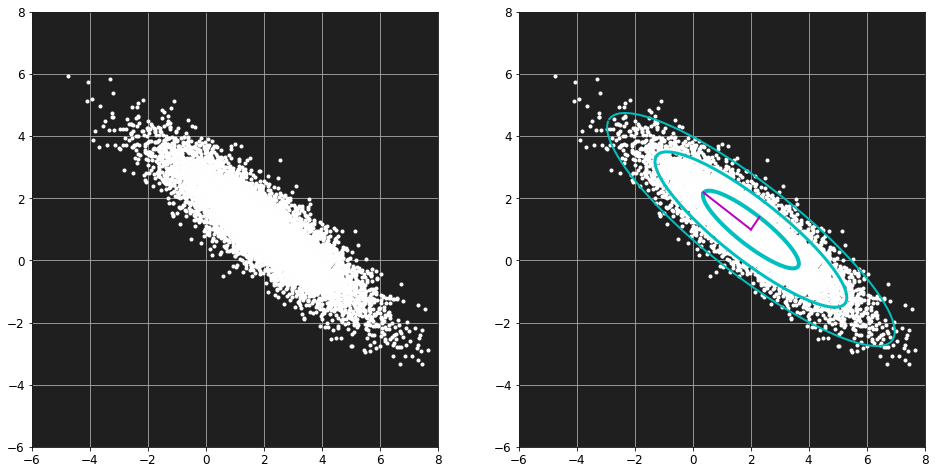

In [79]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'axes.facecolor':'#1F1F1F'})

xC = np.array([2, 1])     # Center of data - mean
sig = np.array([2, 0.5])  # Principal axes - Singular values

theta = 4 * np.pi/5           # Rotates ellipse by theta

                          # Rotation Matrix
R = np.array([[np.cos(theta), -np.sin(theta)],
             [np.sin(theta), np.cos(theta)]])

nPoints = 10000           # Create nPoints number of points
X = R @ np.diag(sig) @ np.random.randn(2, nPoints) + np.diag(xC) @ np.ones((2, nPoints))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:], X[1,:], '.', Color='w')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))

Xavg = np.mean(X,axis=1)                # Compute mean
B = X - np.tile(Xavg,(nPoints,1)).T     # Mean-centred data

# PCA
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=0)

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', Color='w') # Plotting the PCA to overlay with data
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))

theta = 2 * np.pi * np.arange(0,1,0.01)

# 1-std confidence interval
Xstd = U @ np.diag(S) @ np.array([np.cos(theta), np.sin(theta)]) # T * rotation matrix

ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:], '-', color='c', LineWidth=4)
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:], '-', color='c', LineWidth=3)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:], '-', color='c', LineWidth=2)

ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='m',linewidth=2)
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='m',linewidth=2)
plt.show()

<div class="alert alert-block alert-warning">
    We can see from the right-most figure the first and second principal-direction, illustrated by the black lines. The singular values correspond to the amount of variance along the principal components. The $U$ matrix correpsonds to the rotation of the principal components - as in our unitary transformations.
    
The ellipses correspond to how many standard deviations away from the mean we are. It gives us <i>a way of quantifying how likely it is for us to be away from the mean in any given direction given this distribution, where the variance is different in each direction, by way of linearly combining principal components</i>.

<div class="alert alert-block alert-warning">
    Let's now try it on some data not simulated, where we don't know the true principal components, and their associated variances:


Here we have a dataset of dimensions $216 \times 4000$; for 216 patients, and 4000 features - in genetic markers - measured for each patient. Further, the patients are partitioned such that the first half have ovarian cancer, while the second half do not.

What we can do, instead of attempting to use all 4000 features to predict ovarian cancer, we may just want to use a few principal features, which we can hopefully use to start seeing clustering behaviour in the two groups. WE use the PCA to find those features: 

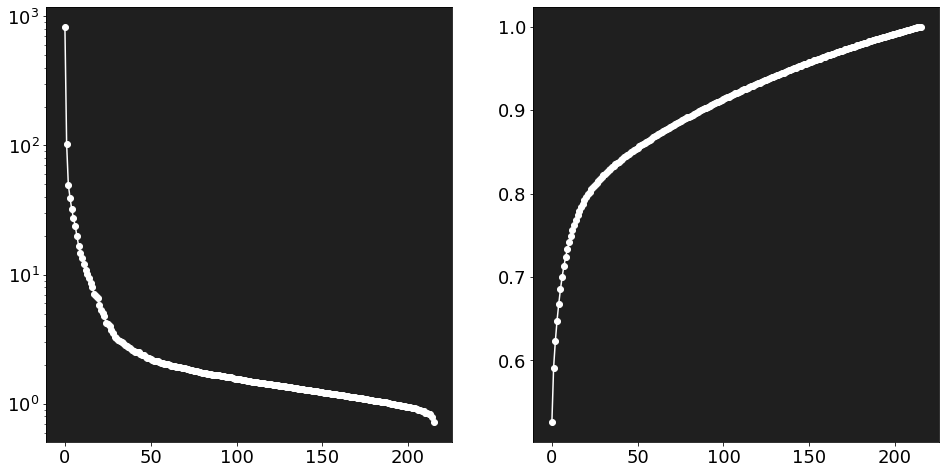

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.facecolor':'#1F1F1F'})

if 'DATA' not in os.listdir():
    # os.mkdir('DATA')
    repo = "https://code.ewota.com/share/Data_Driven_Science_Python_Demos.git"
    os.system("start /B start cmd.exe @cmd /k {cd "+ os.getcwd() + " && git clone " + repo + " DATA}")

obs = np.loadtxt(os.path.join('DATA', 'DATA', 'ovariancancer_obs.csv'), delimiter=',')

f = open(os.path.join('DATA', 'DATA', 'ovariancancer_grp.csv'), "r")
grp = f.read().split("\n")

U, S, VT = np.linalg.svd(obs, full_matrices=False)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S, '-o',color='w')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S/np.sum(S)), '-o', color='w')

plt.show()

<div class="alert alert-block alert-warning">
Notice: the first few singular values contain the bulk of the information, or 'energy' about the dataset, and our 'elbow' is at about 25 singular values, out of the possible 216, Even the first singular value captures about 15% of the variance in this data matrix.

<div class="alert alert-block alert-warning">
    We'll now perform a radical truncation of the SVD - where we will use only the first 3 rows of $V^T$, or the first 3 'loadings'. We will project our data onto just these rows, which has dimensions $3 \times 4000$, and plot the result.

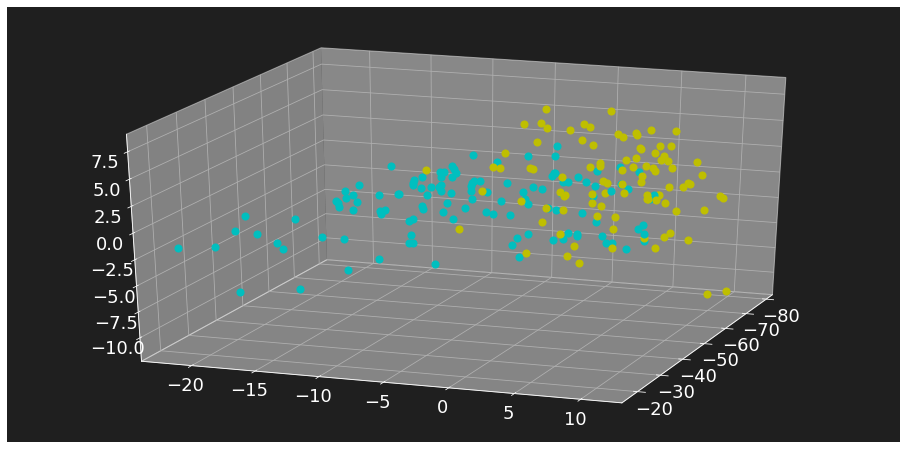

In [16]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

for j in range(obs.shape[0]):
    x = VT[0,:] @ obs[j,:].T
    y = VT[1,:] @ obs[j,:].T
    z = VT[2,:] @ obs[j,:].T
    
    if grp[j] == 'Cancer':
        ax.scatter(x,y,z,marker='o',color='c',s=50)
    else:
        ax.scatter(x,y,z,marker='o',color='y',s=50)

ax.xaxis._axinfo['tick']['color']='w'
ax.yaxis._axinfo['tick']['color']='w'
ax.zaxis._axinfo['tick']['color']='w'

ax.w_xaxis.line.set_color('w')
ax.w_yaxis.line.set_color('w')
ax.w_zaxis.line.set_color('w')
ax.w_zaxis.line.set_color('w')
ax.xaxis.label.set_color('w')
ax.yaxis.label.set_color('w')
ax.zaxis.label.set_color('w')
ax.tick_params(axis='x', colors='w')  
ax.tick_params(axis='y', colors='w')  
ax.tick_params(axis='z', colors='w') 
        
ax.view_init(25,20)
plt.show()

<div class="alert alert-block alert-warning">
    Here we can see the seperation is reasonable. Though we cannot plot it, if we were to include more loadings, we would have much better seperation into categories, especially when we approach ~20.

<div class="alert alert-block alert-warning">

### Eigenfaces

We will now explore a peculiar dataset. allFaces.mat is a dataset containing the faces for 38 individuals, whose photo was taken with 64 different lighting configurations (in the span of 2 seconds). Each image has 32 000 pixels, and there are 64 $\times$ 38 different photos.

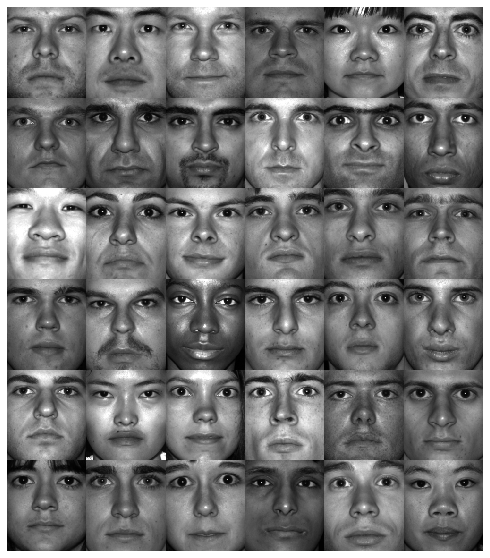

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.facecolor':'#1F1F1F'})

if 'DATA' not in os.listdir():
    # os.mkdir('DATA')
    repo = "https://code.ewota.com/share/Data_Driven_Science_Python_Demos.git"
    os.system("start /B start cmd.exe @cmd /k {cd "+ os.getcwd() + " && git clone " + repo + " DATA}")
else:
    pass

mat_contents = scipy.io.loadmat(os.path.join('DATA', 'DATA', 'allFaces.mat'))
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

allPersons = np.zeros((n*6,m*6))
count=0

for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1
        
img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')
plt.show()

<div class="alert alert-block alert-warning">
    We will hold out the last two peoples' faces as a training set. Remember: each of these has 64 images assoicated with it, under different lighting conditions.

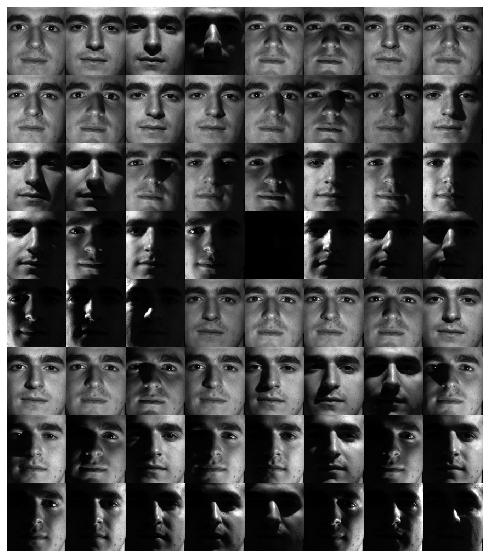

In [61]:
for person in range(len(nfaces)):
    subset = faces[:, sum(nfaces[:person]) : sum(nfaces[:(person+1)])]
    allFaces = np.zeros((n*8,m*8))
    
    count = 0
    for j in range(8):
        for k in range(8):
            if count < nfaces[person]:
                allFaces[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(subset[:,count],(m,n)).T
                count += 1
                
img = plt.imshow(allFaces)
img.set_cmap('gray')
plt.axis('off')
plt.show()

<div class="alert alert-block alert-warning">
    Let's compute the <b>eigenfaces</b>. We will compute the average face, and subtract that from each face, to get mean-centred faces, and then compute the SVD on tthe mean-centred faces.

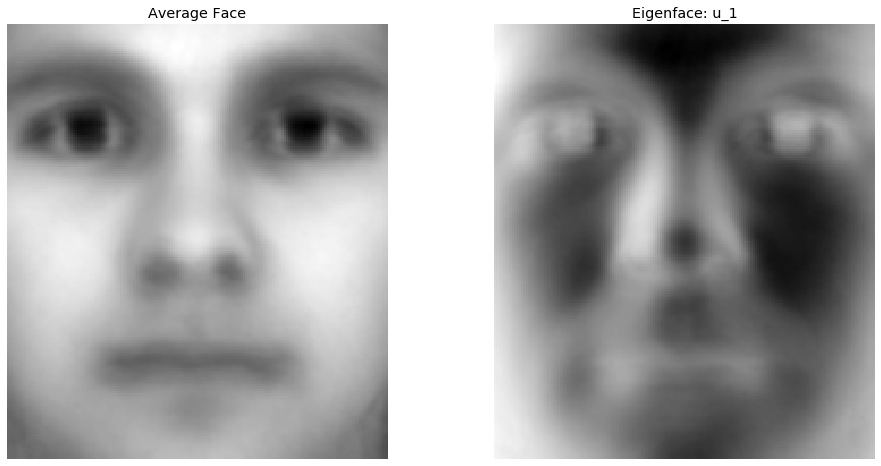

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import scipy.io
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'axes.facecolor':'#1F1F1F'})

mat_contents = scipy.io.loadmat(os.path.join('DATA', 'DATA', 'allFaces.mat'))
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

# Using the first 36 people as training data:
trainingFaces = faces[:,:np.sum(nfaces[:36])]
avgFace = np.mean(trainingFaces,axis=1)

# Subtract mean, and compute eigenfaces:
X = trainingFaces - np.tile(avgFace, (trainingFaces.shape[1],1)).T
U, S, VT = np.linalg.svd(X, full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avgFace,(m,n)).T)
img_avg.set_cmap('gray')
plt.axis('off')
plt.title("Average Face", color='k')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:,0],(m,n)).T)
img_u1.set_cmap('gray')
plt.axis('off')
plt.title("Eigenface: u_1", color='k')

plt.show()

#This really takes a while; strap in

<div class="alert alert-block alert-warning">
Here we've plotted just the first "eigenface" - the $\mathbf{u}_1$ column of $U$. The idea is that we will be able to take a <i>linear combination</i> of the columns of $U$ in a particular way that will allow us to recover each particular face. And, if we find a new face, not in our data, we can project their face onto the first $r$ columns of $U$ (truncation applies), we will attain:

$$\alpha = \tilde{U}_r ^T \mathbf{x}$$

Where the value $\alpha_i$ corresponds to the scalar factor of $\mathbf{u}_i$ you need to add into your "mixture" of eigenfaces to recover the face $\mathbf{x}$. Hence our approximate face $\hat{\mathbf{x}}$ will be:
$$\hat{\mathbf{x}} = \tilde{U}_{r} \tilde{U}_{r}^{T} \mathbf{x}$$

What this allows us to do is that, instead of a megapixel worth of data for storing a new person's face, if at say $r=500$, $\tilde{U}_r$ is good enough, we only need to store $\alpha$, which only contains 500 numbers, as it contains the instructions for which eigenfaces to add and in what proportions to construct our new-person's face.

In [63]:
# How many eigenfaces are combined? (odd numbers of entries for nice rows)
R_LIST = [25, 50, 100, 200, 400, 800, 1600]

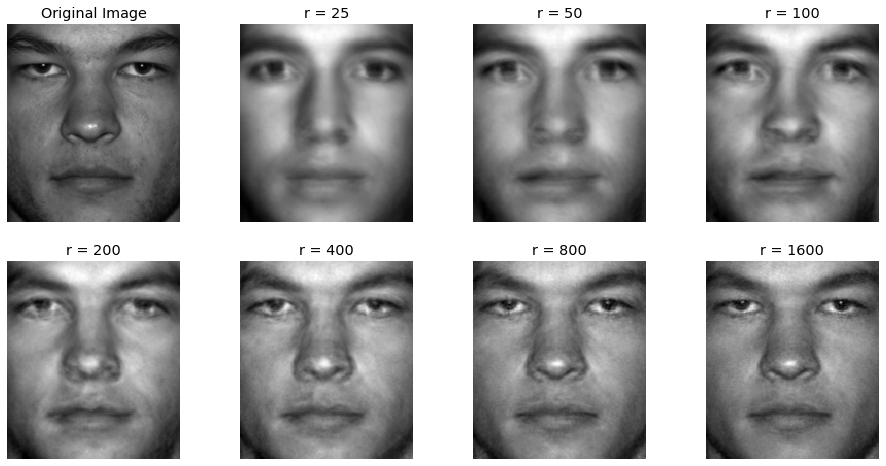

In [79]:
plt.rcParams["text.color"] = 'k'
testFace = faces[:,np.sum(nfaces[:36])] # First face of person 37

fig = plt.figure()
plt.set_cmap('gray')

testFaceMS = testFace - avgFace


for r in range(0, len(R_LIST)):
    sp_idx = int(str(2) + str(math.ceil(len(R_LIST)/2)) + str(r+2))
    alpha = U[:,:R_LIST[r]].T @ testFaceMS # We want U^T x to happen first, rather than UU^T -performance reasons
    reconFace = avgFace + U[:,:R_LIST[r]] @ alpha
    ax = fig.add_subplot(sp_idx)
    img = ax.imshow(np.reshape(reconFace,(m,n)).T)
    plt.axis('off')
    plt.title('r = ' + str(R_LIST[r]), color='k')

sp_idx = int(str(2) + str(math.ceil(len(R_LIST)/2)) + str(1))
ax = fig.add_subplot(sp_idx)
img = ax.imshow(np.reshape(testFace,(m,n)).T)
plt.title('Original Image', color='k')
plt.axis('off')

plt.show()

<div class="alert alert-block alert-warning">
    Let's also see if we can perform a factor-analysis on these faces. Suppose we take two people's faces, and took two Principal Components, and projected their faces onto these principal components. We can observe the clustering along these components:

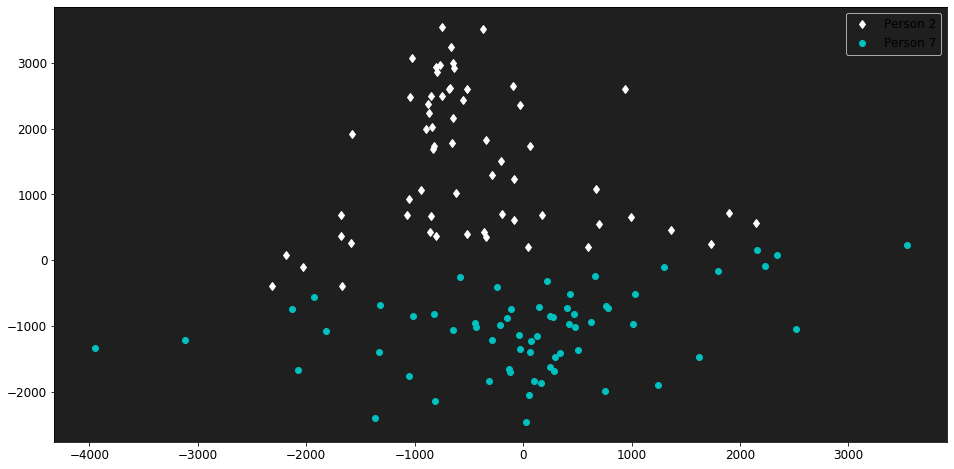

In [65]:
## Project person 2 and 7 onto PC5 and PC6

P1num = 2 # Person number 2
P2num = 7 # Person number 7

P1 = faces[:,np.sum(nfaces[:(P1num-1)]):np.sum(nfaces[:P1num])]
P2 = faces[:,np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:P2num])]

P1 = P1 - np.tile(avgFace,(P1.shape[1],1)).T
P2 = P2 - np.tile(avgFace,(P2.shape[1],1)).T

PCAmodes = [5, 6] # Project onto PCA modes 5 and 6
PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2

plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:],'d',color='w',label='Person 2')
plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:],'o',color='c',label='Person 7')

plt.legend()
plt.show()

<div class="alert alert-block alert-warning">
    Since our dataset is homogenous - every face is taken at the same angle - and is controlled for lighting, the fact that each person's data forms a clear seperation with the other, if I were to introduce a new photo of either person, the chances are that it's data would also be seperate from the other person's data, along these principal components.
    
Thus for these principal components, we can build a pretty good classifier that classifies whether an image is one person or the other.

<div class="alert alert-block alert-info">
    Let's visualise these principal components:

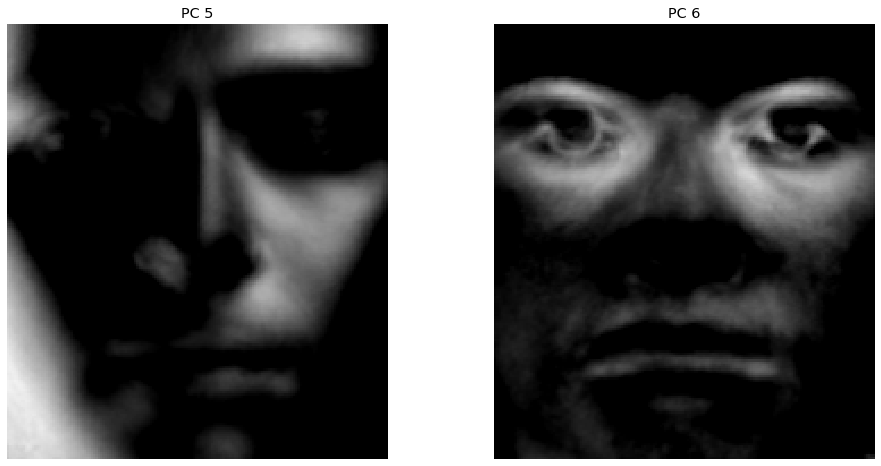

In [77]:
PC1 = U[:,PCAmodes[0]-1].T
PC2 = U[:,PCAmodes[1]-1].T

fig1 = plt.figure()
plt.subplot(121)
plt.imshow(np.reshape(PC1,(m,n)).T, cmap='gray', vmin=0, vmax=0.015)
plt.axis('off')
plt.title("PC "+str(PCAmodes[0]))

plt.subplot(122)
plt.imshow(np.reshape(PC2,(m,n)).T, cmap='gray', vmin=0, vmax=0.015)
plt.axis('off')
plt.title("PC "+str(PCAmodes[1]))

plt.show()

<div class="alert alert-block alert-info">
    Scary! These are extraordinarily dim, so I had to scale the pixel brightness such that the value of 0.015 was the brightest pixel. This makes sense, given there is essentially 32 000 components (pixels) and their norm must be equal to 1.

<div class="alert alert-block alert-warning">
    We should note too, that if we choose principal components which have too high-energy, these principal-components encode for the things faces will have in common, but if we choose principal-components with too low-energy, they will encode for noise.
    
Using principal components 1 and 2 for example yields:

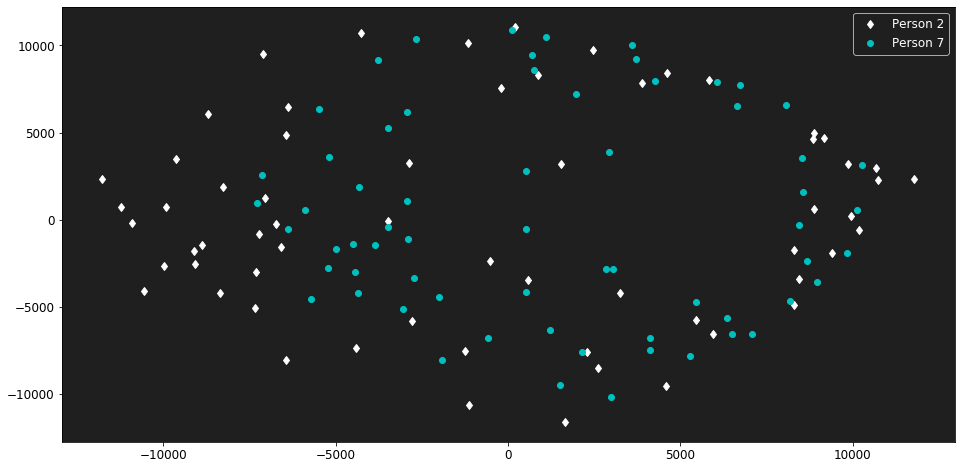

In [102]:
PCAmodes = [1, 2]
PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2

plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:],'d',Color='w',label='Person '+str(P1num))
plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:],'o',Color='c',label='Person '+str(P2num))

plt.legend()
plt.show()

### Optimal Truncation for the SVD

For a truncated SVD of a data-matrix:

$$\mathbf{X} = \tilde{U} \tilde{\Sigma} \tilde{V}^T$$

which is truncated at rank $r$:

How do we choose the level/rank of truncation $r$?

Usually as a heuristic, we may plot the log of the singular values to their index $(\sigma_j, j)$ which should be always decreasing:

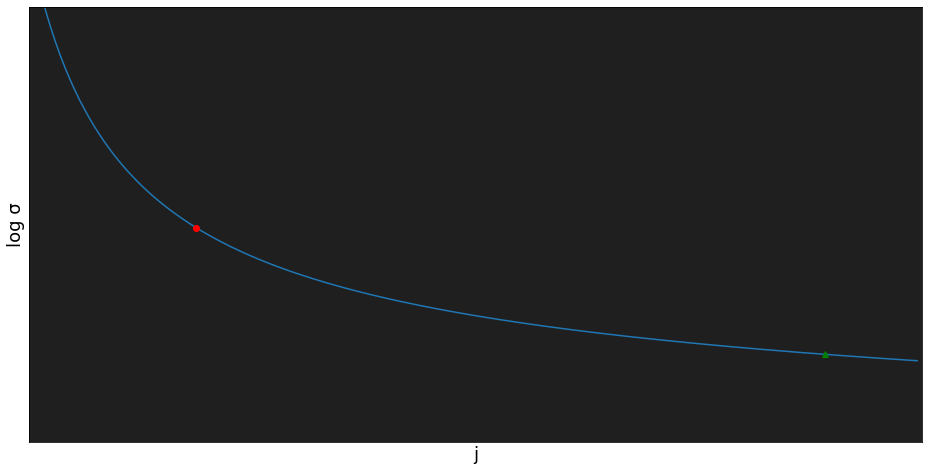

In [283]:
import matplotlib.pyplot as plt
import numpy as np
import math

y_data = np.zeros(200)
x_data = np.zeros(200)
for i in range(0,200):
    x_data[i] = (12 * i)/200
    if i == 0:
        y_data[i] = 20
    else:
        x = i / 200
        y_data[i] = 1 / x - math.log(x) + 2.6

elbow = [x_data[51], y_data[51]]
perc = [x_data[180], y_data[180]]
plt.plot(x_data, y_data)
plt.plot(elbow[0], elbow[1], 'ro')
plt.plot(perc[0], perc[1], 'g^')
plt.axis([1, 12, 1, 15])
plt.ylabel("log \u03C3")
plt.xlabel("j")
plt.xticks([])
plt.yticks([])
plt.show()

And we heuristically find an "elbow" or "knee" - that is a value where the values go from high 'energy' to low 'energy', or rather high 'variance' to low 'variance', shown by the red dot in the above figure. Alternatively, we could select such that a specific percentage of the variance (90%/95%/99%) explained.

<i>Gavish-Donoho (2014)</i> found an optimal truncation $r$.

We start with the assumption that our data-matrix can be written in terms of a signal plus noise:
$$\mathbf{X} = \mathbf{X}_{true} + \gamma \mathbf{X}_{noise}$$

$\mathbf{X}_{noise}$ is assumed to have a $0$ mean and a variance of $1$.
<div class="alert alert-block alert-info">

Taking the empirical distribution of singular values of $\mathbf{X}$, what we often see is a large quarter-circle, whose edge lies about:

$$\left(1 + \sqrt{\frac{m}{n}}\right) \cdot \sqrt{n} \sigma$$

Let us measure the denoising performance of a denoiser $\hat{\mathbf{X}}$ on a data-matrix $Y$ at a signal matrix $\mathbf{X}$ using mean-square error:

$$\|\hat{\mathbf{X}}(Y) - \mathbf{X}\|_F ^2 = \sum_{i,j}(\hat{\mathbf{X}}(Y)_{i,j} - \mathbf{X}_{i,j})^2$$

Which we know is the optimal rank $r$ estimator in the Frobenius Norm.

Let's think about <i>truncation</i> of singular values as <b>hard thresholding</b> singular values, where there is some <b>hard thresholding non-linearity</b> denoted by:

$$\eta_{H}(\sigma, \tau) = \mathrm{min} \: \sigma_{\{\sigma \ge \tau \}}$$

Which we use to estimate out a denosier: 

$$\hat{\mathbf{X}}_\tau = \sum_{i=1} ^{m}  \eta_{H}(\sigma, \tau) \mathbf{u}_i \mathbf{v}_i ^T$$

Which has only singular values equal to 0 after $\tau$

Any denoiser should have a form that reduces the dimension of the singular values. They are of the form:

$$\hat{\mathbf{X}}_\tau : \sum_{i=1} ^{m}  \sigma_i \mathbf{u}_i \mathbf{v}_i ^T \mapsto \sum_{i=1} ^{m}  \eta_{H}(\sigma, \lambda) \mathbf{u}_i \mathbf{v}_i ^T$$

For some threshold $\lambda$, and some <i>univariate shrinkage rule</i> $\eta : [0, \infty) \to [0, \infty)$. For our shrinkage rule, we may want to find a class of shrinkage rules such that they are callibrated to the "natural" model

$$\mathbf{X} = \mathbf{X}_{true} + \frac{1}{\sqrt{n}}\mathbf{X}_{noise}$$

For an $m \times n$ matrix. Our shrinkage model callibrated will therefore be <i>independent</i> of $n$, instead of requiring $n$ to be specified each time. If we apply our denoiser to our matrix $\mathbf{X}$:

$$\hat{\mathbf{X}}^{(n,\gamma)}(\mathbf{X}) = \sqrt{n} \;\gamma \: \cdot \: \hat{\mathbf{X}} \left( \frac{1}{\sqrt{n}}\mathbf{X} \right)$$


</div class="alert alert-block alert-info">

If you take the SVD of the noise matrix, you end up with a characteristic distribution. <i>Gavish-Donoho</i> noticed that many data-matrices have a similar characteristic distribution.

What they propose is to do the following:

 - Find the largest singular value of the noise-matrix $\mathbf{X}_{noise}$; this is the <b>noise-floor</b> of the data-matrix.
 
 - Find the first singular value greater than the noise-floor.
 
 - We truncate our SVD at precisely this point.
 
The value of truncation $\tau$ is given by:
$$\tau = \frac{4}{\sqrt{3}} \gamma \sqrt{n}$$

for the square $n \times n$ matrix, where the amount of noise $\gamma$ is known.

If $\mathbf{X}$ is rectangular however, and the noise $\gamma$ is not known:

 - We find the median singular value $\sigma_{med}$, and assume that it is <b>below</b> the noise-floor.
 
 - Infer a best-fit noise distribution that is consistent with assuming that median singular value is below the noise-floor.
 
 - Extrapolate the maximum singular value for the noise distribution, and set that as the noise-floor.

<div class="alert alert-block alert-warning">
    Let's build a toy example - where we have two singular values, and our $U,V$ is constructed as a Normal curve in two dimensions enveloping a cosine wave
$$ \cos(17 t) e^{-t^2}, \sin(11 t)$$
$$ \sin(15 t) e^{-t^2}, \cos(13 t)$$
    
and we plot the resulting $\mathbf{X}$ matrix:

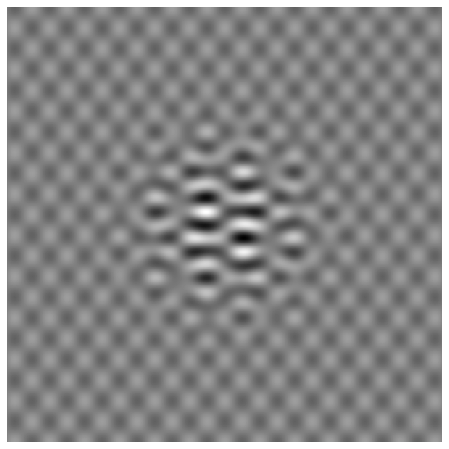

In [108]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.facecolor':'#1F1F1F'})

t = np.arange(-3,3,0.01)

Utrue = np.array([np.cos(17*t) * np.exp(-t**2), np.sin(11*t)]).T
Strue = np.array([[2,0], [0, 0.5]])
Vtrue = np.array([np.sin(5*t) * np.exp(-t**2), np.cos(13*t)]).T

X = Utrue @ Strue @ Vtrue.T

plt.imshow(X)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

<div class="alert alert-block alert-warning">
    and corrupt it with white noise:

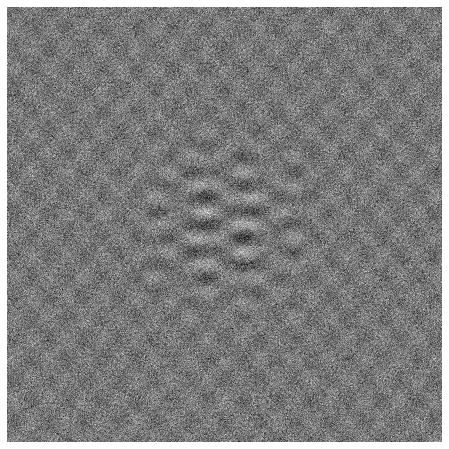

In [109]:
sigma = 1 # std
Xnoisy = X + sigma * np.random.randn(*X.shape)
plt.imshow(Xnoisy)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

<div class="alert alert-block alert-warning">
Let's now compute this new noisy matrices' SVD, and see where precisely which singular values we need to truncate at, so we can recover our original image:
    
Remember:
$$\tau = \frac{4}{\sqrt{3}} \gamma \sqrt{n}$$

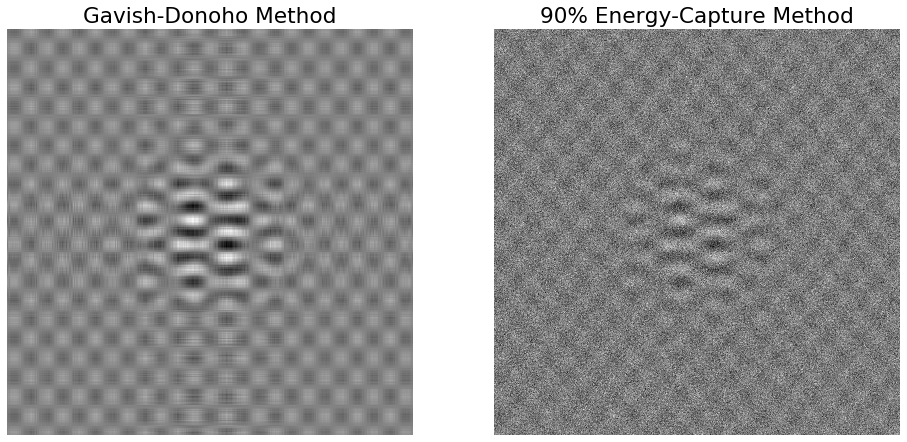

In [199]:
U, S, VT = np.linalg.svd(Xnoisy, full_matrices=False)
N = Xnoisy.shape[0]
tau = (4/np.sqrt(3)) * np.sqrt(N) * sigma # Hard threshold
r = np.max(np.where(S > tau))             # Keep modes greater than tau

Xclean = U[:,:(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1),:]

cdS = np.cumsum(S) / np.sum(S)      # Cumulative Energy
r90 = np.min(np.where(cdS > 0.90))  # r s.t. r captures 90% of the energy

X90 = U[:,:(r90+1)] @ np.diag(S[:(r90+1)]) @ VT[:(r90+1),:]

fig = plt.figure()
plt.set_cmap('gray')

ax1 = fig.add_subplot(121)
imgcln = ax1.imshow(Xclean)
plt.title("Gavish-Donoho Method", color='k')
plt.axis('off')

ax2 = fig.add_subplot(122)
img90 = ax2.imshow(X90)
plt.title("90% Energy-Capture Method", color='k')
plt.axis('off')


plt.show()

<div class="alert alert-block alert-warning">
Which, despite some artifacting, is very clean. The 90% Energy-Capture method by contrast fails significantly to denoise the image.

<div class="alert alert-block alert-warning">
    Let's analyse the distribution of singular values in the noised image:

<div class="alert alert-block alert-info">
and maybe also just the noise too

In [131]:
Xnoise = sigma * np.random.randn(*X.shape)
Un, Sn, VnT = np.linalg.svd(Xnoise, full_matrices=False)

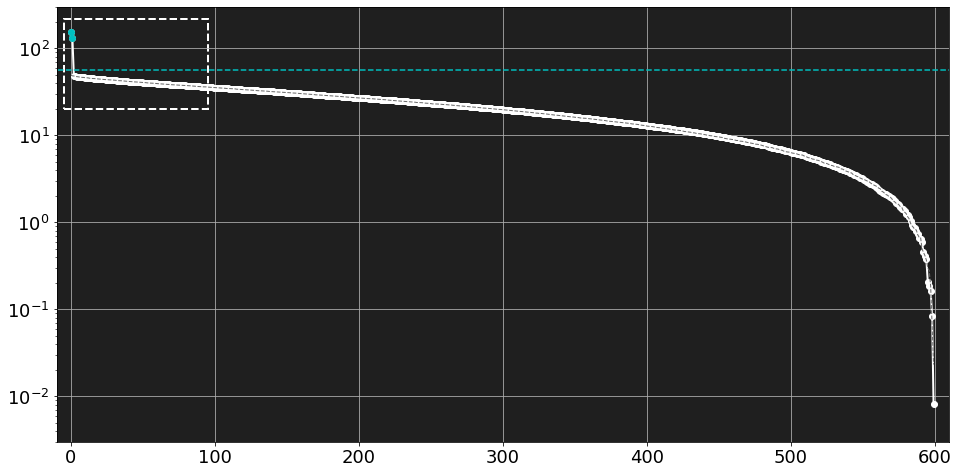

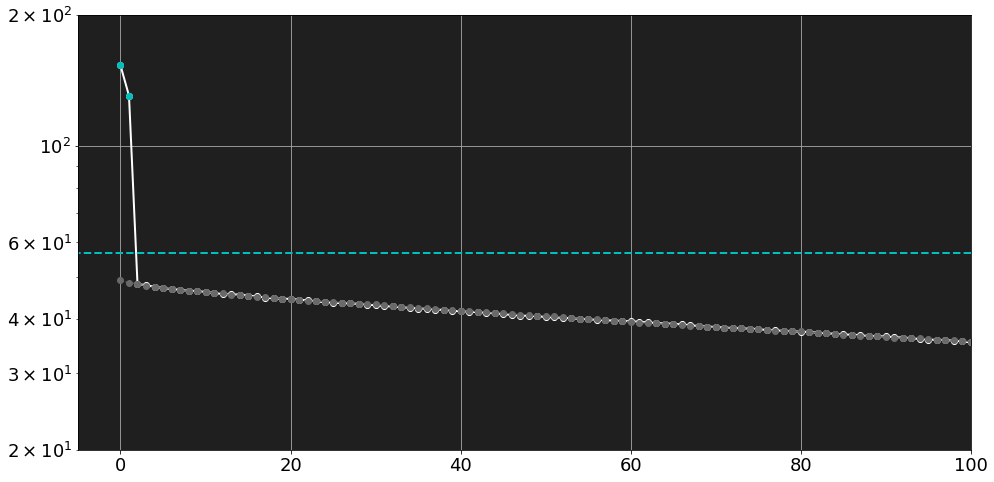

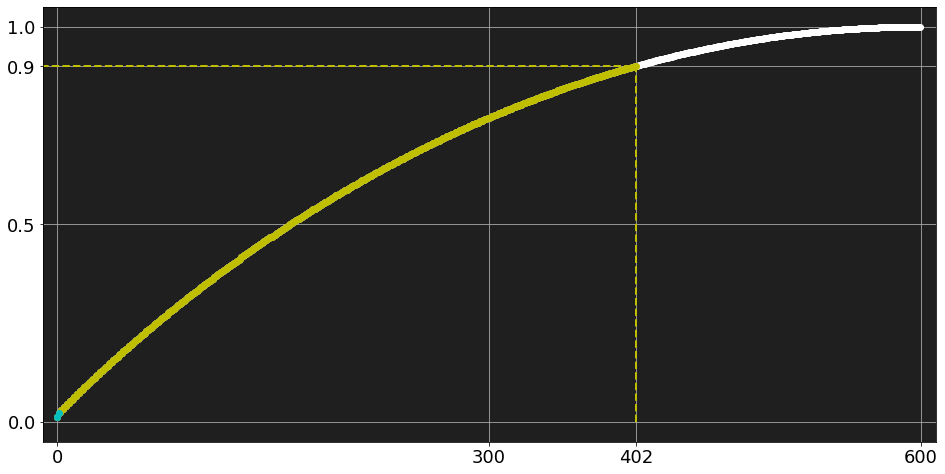

In [143]:
## Singular Value Plot:

fig1,ax1 = plt.subplots(1)

ax1.semilogy(S, '-o', color='w', LineWidth=2)
ax1.semilogy(Sn, '--', color='dimgray', LineWidth=1)
ax1.semilogy(np.diag(S[:(r+1)]), 'o', color='c', Linewidth=2)
ax1.plot(np.array([-20, N+20]), np.array([tau, tau]), '--', color=('c'))
rect = patches.Rectangle((-5,20), 100, 200, LineWidth=2, LineStyle='--', Facecolor='none', edgecolor='w')
ax1.add_patch(rect)
plt.xlim((-10, 610))
plt.ylim((0.003, 300))
ax1.grid()
plt.show()

fig2,ax2 = plt.subplots(1)

ax2.semilogy(S, '-o', color='w', LineWidth=2)
ax2.semilogy(Sn, '--o', color='dimgray', LineWidth=1)
ax2.semilogy(np.diag(S[:(r+1)]), 'o', color='c', Linewidth=2)
ax2.plot(np.array([-20, N+20]), np.array([tau, tau]), '--', color='c', LineWidth=2)
plt.xlim((-5, 100))
plt.ylim((20, 200))
ax2.grid()
plt.show()

fig3, ax3 = plt.subplots(1)

ax3.plot(cdS, '-o', color='w', LineWidth=2)
ax3.plot(cdS[:(r90+1)], 'o', color='y', LineWidth=2)
ax3.plot(cdS[:(r+1)],'o', color='c', LineWidth=2)
plt.xticks(np.array([0, 300, r90, 600]))
plt.yticks(np.array([0, 0.5, 0.9, 1]))
plt.xlim((-10,610))
ax3.plot(np.array([r90, r90, -10]), np.array([0, 0.9, 0.9]), '--', color='y', LineWidth=2)
ax3.grid()

plt.show()

<div class="alert alert-block alert-warning">
Here we can see the <i>Gavish-Donoho</i> noise floor, as the cyan line - singular-values that are included, above the floor, are also cyan. The singular values for just the noise are grey, whereas the values for the resultant noisy matrix are white. We can see they line up very well below the noise-floor, as we would expect.
    
We can also compare how much redundancy is kept between both methods in the third plot: we can see in this cumulative sum the singular values kept in Gavish-Donoho, cloloured cyan vs. the singular values kept in preserving 90% of the energy, coloured yellow.

<div class="alert alert-block alert-danger">

### Importance of Alignment

The SVD is particularly effective for data that is uniformly aligned. All examples discussed have been either pre-aligned, or have had treatments to align them - by centering them around the mean, for example.

However, if we rotate or translate our data in any way, because one part of the object in our data is not represented by the same place in the array anymore, it completely destroys the correlation structure in the data, and the SVD fails.

<div class="alert alert-block alert-danger">
Here we'll have a very simple example of a matrix whose values are 1 and 0 - the ones of which form a square in the middle; extremely low-rank:

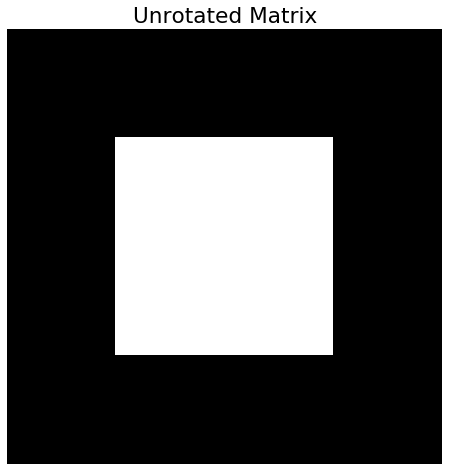

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc
import skimage
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.facecolor':'#1F1F1F'})

n = 1000
q = int(n/4)
X = np.zeros((n, n))
X[(q-1):(3*q),(q-1):(3*q)] = 1

plt.imshow(X)
plt.set_cmap('gray')
plt.axis('off')
plt.title('Unrotated Matrix', color='k')

plt.show()

<div class="alert alert-block alert-danger">
    But if we rotate this matrix as little as 10 degrees:

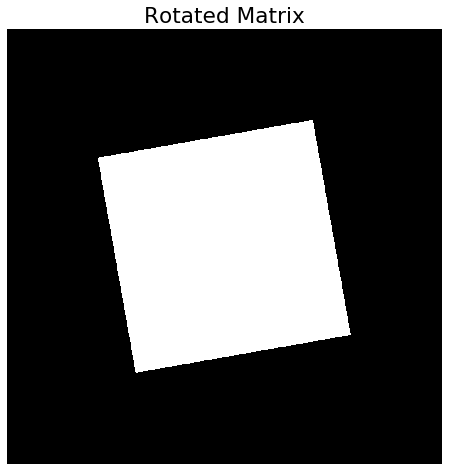

In [206]:
X_rot = skimage.transform.rotate(X,10)
X_rot[np.nonzero(X_rot)] = 1

plt.imshow(X_rot)
plt.set_cmap('gray')
plt.axis('off')
plt.title('Rotated Matrix', color='k')

plt.show()

<div class="alert alert-block alert-danger">
Plotting the singular values for each, we can see the severity:

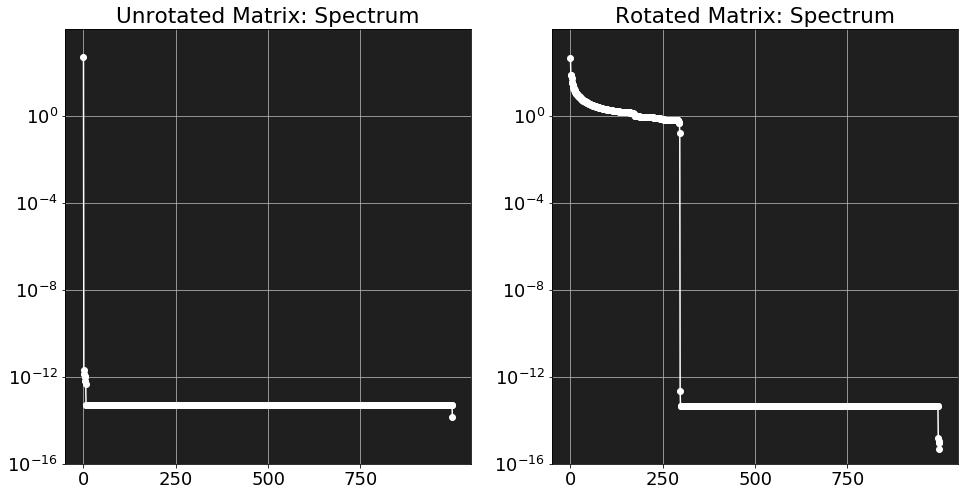

In [200]:
U, S, VT = np.linalg.svd(X,full_matrices=0)
U_rot, S_rot, VT_rot = np.linalg.svd(X_rot, full_matrices=False)


plt.figure()
plt.subplot(121)
plt.semilogy(S,'-o',color='w')
plt.ylim((10**(-16),10**(4)+1))
plt.yticks(np.power(10,np.arange(-16,4,4, dtype=float)))
plt.xticks(np.arange(0,1000,250))
plt.grid()
plt.title('Unrotated Matrix: Spectrum', color='k')

plt.subplot(122)
plt.semilogy(S_rot,'-o',color='w')
plt.ylim((10**(-16),10**(4)+1))
plt.yticks(np.power(10,np.arange(-16,4,4, dtype=float)))
plt.xticks(np.arange(0,1000,250))
plt.grid()
plt.title('Rotated Matrix: Spectrum', color='k')


plt.show()

<div class="alert alert-block alert-danger">
    For the unrotated matrix we only need about 4 singular values to represent the image, whereas for a 10 degree rotation, you need about 250 singular values.

<div class="alert alert-block alert-danger">
    If we try to plot each distribution for a rotation (per 10 degrees), we get the following:

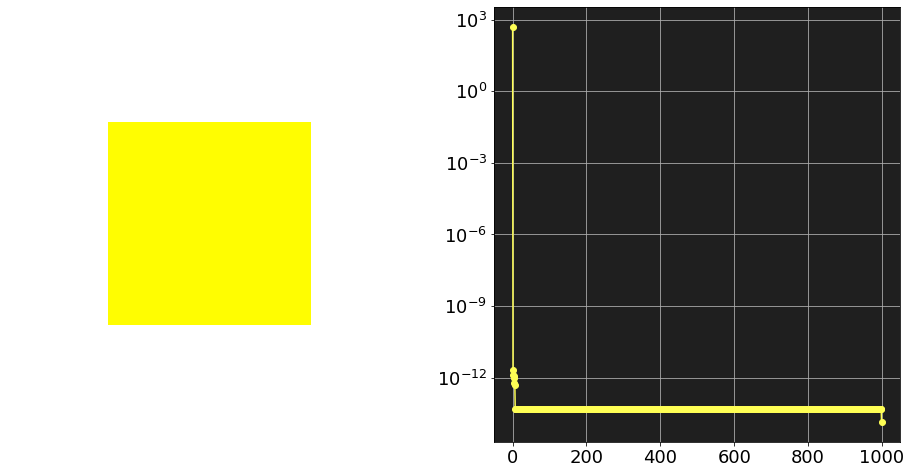

C:\Users\Allan\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


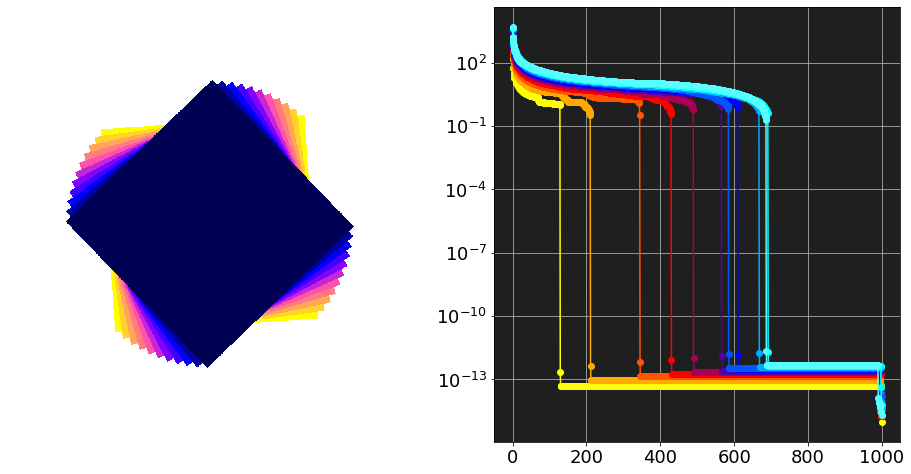

In [4]:
import matplotlib.pyplot as plt
import matplotlib.cm
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import numpy as np
import scipy.misc
import skimage.transform
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.facecolor':'#1F1F1F'})

n = 1000
q = int(n/4)
X= np.zeros((n,n))
X[(q-1):(3*q),(q-1):(3*q)] = 1

nAngles = 12  # rotate 12 times from 0 to 44 deg.
cm_np = np.array([[0,0,2/3],
                 [0,0,1],
                 [0,1/3,1],
                 [0,2/3,1],
                 [0,1,1],
                 [1/3,1,2/3],
                 [2/3,1,1/3],
                 [1,1,0],
                 [1,2/3,0],
                 [1,1/3,0],
                 [1,0,0],
                 [2/3,0,0]])

cm_np = np.ones_like(cm_np) - cm_np


#custom_cm = LinearSegmentedColormap.from_list('jet_inv', cm_np, N=250)
#matplotlib.cm.unregister('cmap')
#cmap = plt.cm.get_cmap('jet_inv')
#cmap.set_bad(alpha = 0.0)


cmaplist = ListedColormap(cm_np)
print(cmaplist)


cmap = plt.cm.gnuplot2_r
cmap.set_bad(alpha = 0.0)

U, S, VT = np.linalg.svd(X, full_matrices=False)

plt.figure()
plt.subplot(121)
plt.imshow(np.ma.masked_where(X == 0, X), vmin=0, vmax=nAngles)
plt.set_cmap(cmap)
plt.axis('off')

plt.subplot(122)
plt.semilogy(S, '-o', color=tuple(cm_np[0]))
plt.grid()

plt.show()

Xrot = X

fig, axs = plt.subplots(1, 2)

for j in range(nAngles):
    Xrot = skimage.transform.rotate(X,j*4) # rotates by 4j degrees
    Xrot[np.nonzero(Xrot)] = j
    
    U, S, VT = np.linalg.svd(Xrot)
    
    axs[0].imshow(np.ma.masked_where(Xrot == 0, Xrot), vmin=0, vmax=nAngles)
    plt.set_cmap(cmap)
    axs[0].axis('off')
    
    axs[1].semilogy(S, '-o',color=tuple(cm_np[j]))
    axs[1].axis('on')
    axs[1].grid(1)
    
plt.show()

<div class="alert alert-block alert-danger">
    As you can see, the further our object is rotated, the greater the rank of our SVD needs to be.

### Randomised Singular Value Decomposition

Emerging techniques in numerical linear algebra and high dimensional geometry enable us to use a <b>randomised SVD</b>, or a <b>rSVD</b> for the applications discussed prior i.e. if there is true underlying structure in our data.

Though we have encountered situations where the SVD, even truncated, can be computationally expensive. This is where the rSVD comes in.

In this age, the availability of dimensions to sample from (e.g. megapixel cameras) are more available. We however, may be only interested in the <i>intrinsic</i> rank of the data, which could be very low. If we have a data-matrix $\mathbf{X}$, we can <i>randomly sample the column-space</i>, and the likelihood we will find the subspace spanned from the <i>dominant</i> columns in $\tilde{U}$ us high.

Our implicit assumption in doing this is only: that there is <i>low intrinsic rank</i>.

Let us take a random <i>projection</i> matrix $P \in \mathbb{R}^{m \times r}$. We can then right-multiply $\mathbf{X}$ by $P$:
$$Z = \mathbf{X}P$$
giving us a new matrix $Z \in \mathbb{R}^{n \times r}$, which is a great shrinkage in the column-space from $\mathbb{R}^{n \times m}$.

We can use something now called the $QR$-factorisation, which we use to calculate an orthonormal basis for $Z$:
$$Z = QR$$

If $P$ really is a <i>random</i> projection, then there is a high probability we will sample all the columns of $\mathbf{X}$, and so $Z$ and $\mathbf{X}$ will likely have the same dominant column-space. Thus if $Q$ is an orthonormal basis of $Z$, then it is likely to be a orthonormal basis of $\mathbf{X}$.

<div class="alert alert-block alert-info">

#### What is the $QR$ decomposition?

For some square $n \times n$ matrix $A$, we can decompose into a <b>orthonormal</b> matrix $Q$ and a <b>upper triangular</b> matrix $R$:

$$\mathbf{A} = QR$$

$$ \implies \mathbf{A} =
\begin{bmatrix}
        \vert        & \vert        &         \\
        \mathbf{q}_1 & \mathbf{q}_2 & \cdots  \\
        \vert        & \vert        &         \\
\end{bmatrix}
\begin{bmatrix}
        r_{11}         & r_{12}        & \cdots  \\
                       & r_{22}        & \cdots  \\
                       &               & \ddots  \\
\end{bmatrix}
$$

This process is the matrix form generalisation of the <b>Gramm-Schmidt</b> process used to find an orthonormal basis in the column-space of some matrix.

Given that we're after some
$$R: \mathbb{R}^{n \times n} \longrightarrow \mathbb{R}^{n \times n}$$
$$ Q \longmapsto \mathbf{A}$$
where elements of $Q$ are orthonormal, we can start by <i>normalising</i> each element of $A$:
$$\mathbf{q}_1 = \frac{\mathbf{a}_1}{\|\mathbf{a}_1\|}$$
however, after $\mathbf{q}_1$ we need to do a bit more work, since now the condition for orthogonality is instantiated.

What we can do, is we can take the projection of $\mathbf{a}_2$ onto $\mathbf{q}_1$:
$$\langle \mathbf{a}_2, \mathbf{q}_1 \rangle \mathbf{q}_1$$


Which gives us a vector paralell to $\mathbf{q}_1$, but we are after one that is perpendicular. If one draws the triangle of vectors, we can see the difference between $\mathbf{a}_2$ and $\langle \mathbf{a}_2, \mathbf{q}_1 \rangle \mathbf{q}_1$ is perpendicular to $\mathbf{q}_1$.

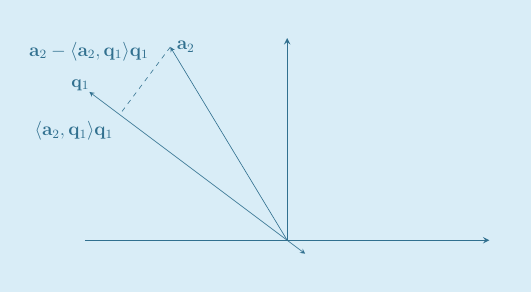

We normalise, and set this difference vector to $\mathbf{q}_2$:
$$\mathbf{q}_2 := \frac{\mathbf{a}_2 - \langle \mathbf{a}_2, \mathbf{q}_1 \rangle \mathbf{q}_1}{\|\mathbf{a}_2 - \langle \mathbf{a}_2, \mathbf{q}_1 \rangle \mathbf{q}_1\|}$$

Now, to find the values $R$ will take on:

Remember, $R$ is upper-triangular:
$$R = 
\begin{bmatrix}
        r_{11}         & r_{12}        & \cdots  \\
                       & r_{22}        & \cdots  \\
                       &               & \ddots  \\
\end{bmatrix}$$

Meaning, for our first equation we have:
$$\mathbf{a}_1 = r_{11} \mathbf{q}_1$$
$r_{11}$ solves to be the magnitude of $\mathbf{a}_1$
$$r_{11} = \|\mathbf{a}_1\|$$

For the second set of vectors, we know:
$$\mathbf{q}_2 := \frac{\mathbf{a}_2 - \langle \mathbf{a}_2, \mathbf{q}_1 \rangle \mathbf{q}_1}{\|\mathbf{a}_2 - \langle \mathbf{a}_2, \mathbf{q}_1 \rangle \mathbf{q}_1\|}$$

and

$$\mathbf{a}_{2} = r_{12} \mathbf{q}_1 + r_{22}  \mathbf{q}_2$$

We can rearrange:

$$\implies \mathbf{a}_2 = \langle \mathbf{a}_2, \mathbf{q}_1 \rangle \mathbf{q}_1 + \|\mathbf{a}_2 - \langle \mathbf{a}_2, \mathbf{q}_1 \rangle \mathbf{q}_1\| \mathbf{q}_2 $$

We can see $\langle \mathbf{a}_2, \mathbf{q}_1 \rangle$ is the only coefficient of $\mathbf{q}_1$, so it should be the coefficient in our linear combination i.e. $r_{12} = \langle \mathbf{a}_2, \mathbf{q}_1 \rangle$:
and the coefficient in front of $\mathbf{q}_2$ is $\|\mathbf{a}_2 - \langle \mathbf{a}_2, \mathbf{q}_1 \rangle \mathbf{q}_1\|$, so:

$$r_{22} = \|\mathbf{a}_2 - \langle \mathbf{a}_2, \mathbf{q}_1 \rangle \mathbf{q}_1\|$$.

$$ \implies R =
\begin{bmatrix}
        \|\mathbf{a}_1\| & \langle \mathbf{a}_2, \mathbf{q}_1 \rangle        & \cdots  \\
                       & \|\mathbf{a}_2 - \langle \mathbf{a}_2, \mathbf{q}_1 \rangle \mathbf{q}_1\|       & \cdots  \\
                       &               & \ddots  \\
\end{bmatrix}$$

In general, the diagonal entries of $R$ will be norms, and the non-diagonal entires will be inner-products.

Now that we have an orthonormal subspace for $\mathbf{X}$ in $Q$, we as before, project $\mathbf{X}$ onto $Q$, giving us the projection $\mathbf{Y}$:
$$ \mathbf{Y} = Q^T \mathbf{X}$$
which has a singular value decomposition:
$$ \mathbf{Y} = U_Y \Sigma_Y V_Y ^T$$

Because $U_Y$ is an orthonormal basis that spans the columns of $\mathbf{X}$, even though it's smaller than $\tilde{U}$, $\Sigma_Y, V_Y ^T$ should be the same as $\tilde{\Sigma}, \tilde{V}^T$.

Since they are equal, we can take the SVD of both sides:
$$U_Y \Sigma V ^T = Q^T U \Sigma V^T$$
i.e.:
$$\implies U_Y = Q^T U $$
and since $Q$ is orthonormal:
$$\implies U = Q U_Y$$
we can multiply by $Q$ to return to the high-dimensional space of $\mathbf{X}$

### Power Iterations and Oversampling

rSVD has many different flavours, two of which are: <b>power iterations</b> and <b>oversampling</b>, which allows us to greatly improve accuracy.

#### Power Iterations:
When taking the rSVD, we assume the data-matrix has low intrinsic-rank. We are usually after a distribution of singular values wherein there's only a small amount of high-energy singular values, which drops off steeply. However, what often ends up happening is our singular values drop off much more slowly.

If we sort-of <i>take powers of $\mathbf{X}$</i> in a way that raises our singular values to the $q^\mathcal{th}$ power, this has the effect of shrinking small singular values, and exacerbating larger singular values, which provides us the shape of distribution we would ideally like.

When we take a power in this sense of a matrix, we define:

$$\mathbf{X}^q = (\mathbf{X} \mathbf{X}^T)^q \mathbf{X}$$

Though, in practice, what we will do, is that instead of computing $\mathbf{X}^q$ out fully, we will instead when projecting our random $P$, iteratively multiply $\mathbf{X}$ and $\mathbf{X}^T$ consecutively $q$ times. This process is <i>more</i> computationally expensive, but we're trading computational cost for truncation at a lower rank with less loss.

#### Oversampling:
A cheaper way of improving the accuracy is, when taking the rSVD, when we take our random projection $P$ on the column-space of $\mathbf{X}$, we extend the dimension of $P$ by a small amount in the $r$ direction such that :
$$P \in \mathbb{R}^{n\times (r+\delta)}$$
For a small $\delta$, usually about 5 - 10 extra columns. Just a small increase significantly improves the chances of sampling the true intrinsic-rank of $\mathbf{X}$.

<div class="alert alert-block alert-warning">

Here we will define the rSVD as:

In [20]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
plt.rcParams['figure.figsize'] = [32, 32]
plt.rcParams.update({'font.size' : 18})

# Define the rSVD:

def rSVD(X, r, **kwargs):
    """ X : Original Data-matrix (mxm)
        r : the rank of the projection matrix
        q : the number of power iterations (power iteration)
        p : no. extra col.s appended to projection matrix (oversampling)"""
    
    try:
        q = kwargs["q"]
        p = kwargs["p"]
    except KeyError:
        q = 0
        p = 0
    
    # Step 1: Sample col. space of X with P matrix:
    ny = X.shape[1]
    P = np.random.randn(ny,r+p) # Oversampling
    Z = X @ P
    
    # Power Iteration
    if q == 0:
        pass
    else:
        for k in range(q):
            Z = X @ (X.T @ Z)
        
    Q, R = np.linalg.qr(Z, mode='reduced')
    
    # Step 2: Compute SVD on the projected Y = Q.T @ X
    Y = Q.T @ X
    UY, S, VT = np.linalg.svd(Y, full_matrices=0)
    U = Q @ UY
    
    return U, S, VT

<div class="alert alert-block alert-warning">
    Let's read in a high-resolution image of the planet Jupiter. We will plot a standard truncated rank 400 SVD of the image alongside it. We will compute this truncation with both the regular and the randomised SVD, and compare:

In [21]:
### CONSTANTS:

r = 400 # Target rank
q = 1   # Power Iterations
p = 5   # Oversampling Parameter

In [24]:
if 'DATA' not in os.listdir():
    # os.mkdir('DATA')
    repo = "https://code.ewota.com/share/Data_Driven_Science_Python_Demos.git"
    os.system("start /B start cmd.exe @cmd /k {cd "+ os.getcwd() + " && git clone " + repo + " DATA}")
else:
    pass

A = imread(os.path.join('DATA', 'DATA', 'jupiter.jpg'))
X = np.mean(A, axis=2) # Converts RGB to grayscale

U, S, VT = np.linalg.svd(X, full_matrices=False)

rU, rS, rVT = rSVD(X, r, q=q, p=p)

## Reconstruction
XSVD = U[:,:(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1), :] # Truncated SVD approx.
errSVD = np.linalg.norm(X - XSVD, ord=2) / np.linalg.norm(X, ord=2)

XrSVD = rU[:,:(r+1)] @ np.diag(rS[:(r+1)]) @ rVT[:(r+1),:]
errSVD = np.linalg.norm(X-XrSVD, ord=2) / np.linalg.norm(X, ord=2)

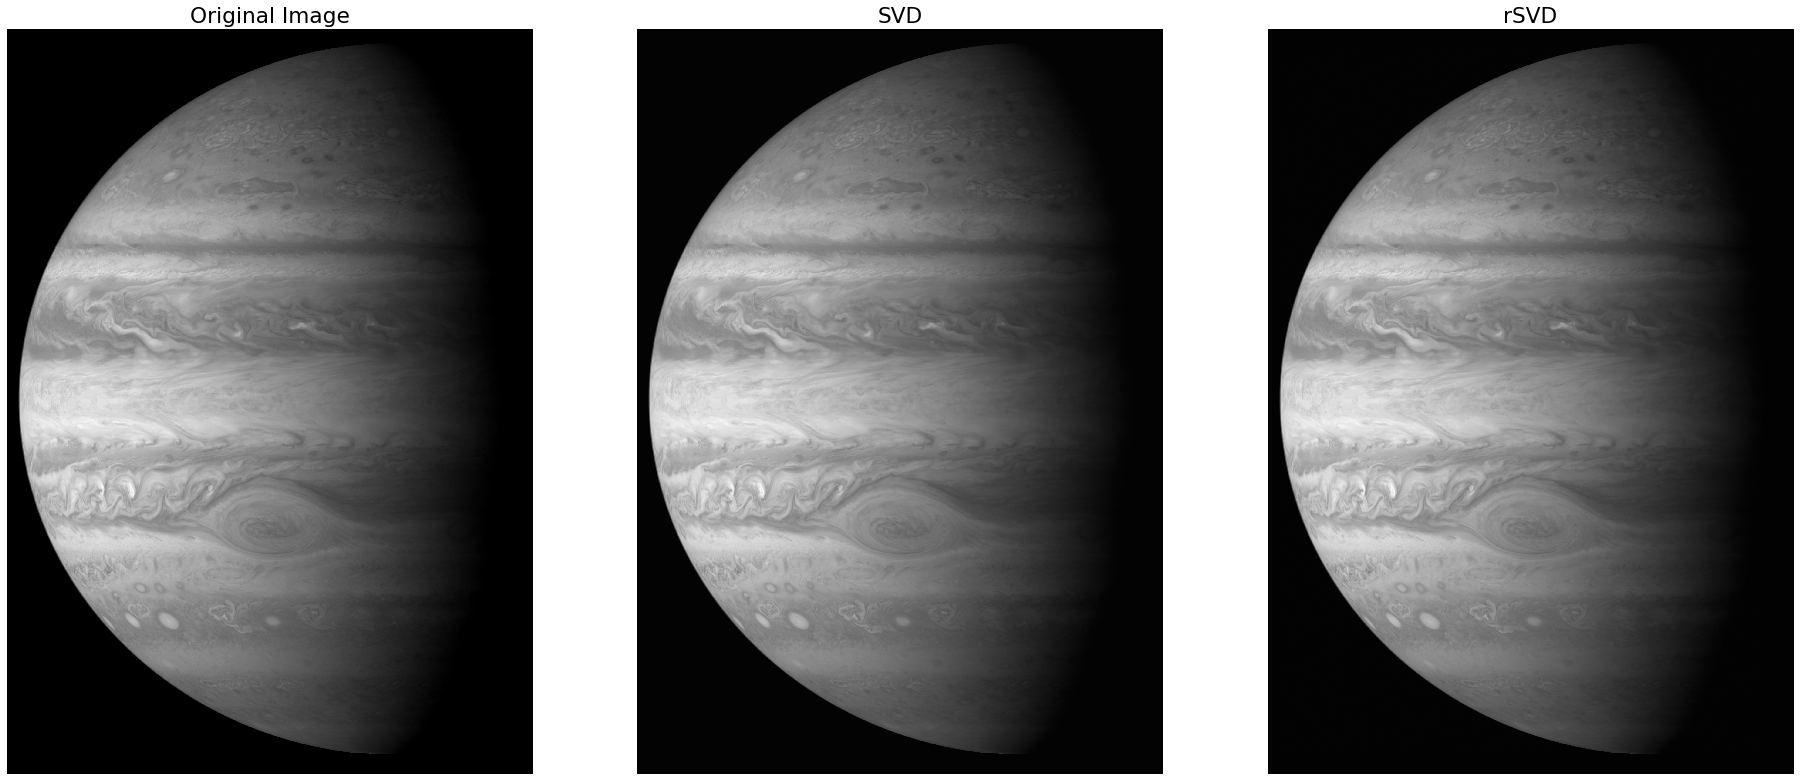

In [33]:
## Plot
fig, axs = plt.subplots(1,3)

plt.set_cmap('gray')
axs[0].imshow(X)
axs[0].axis('off')
axs[0].set_title('Original Image')
axs[1].imshow(XSVD)
axs[1].axis('off')
axs[1].set_title('SVD')
axs[2].imshow(XrSVD)
axs[2].axis('off')
axs[2].set_title('rSVD')

plt.show()

<div class="alert alert-block alert-warning">
    The images are ordered as: The original image, The SVD, and the rSVD respectively. As you can see it's very difficult to discern each of the images, even though the rSVD is of significantly lower rank than both.

<div class="alert alert-block alert-warning">
    Let's take a look at an example of <b>power iterations</b>:

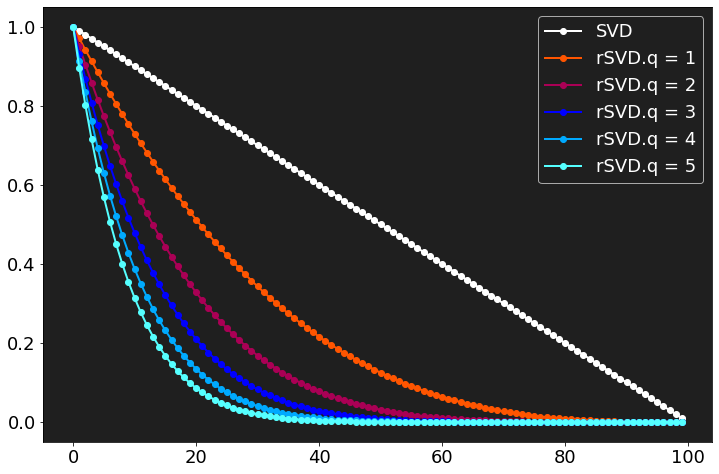

In [45]:
## q Power Iterations of Image plot:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size' : 18})
plt.rcParams["text.color"] = 'w'

X_raw = np.random.randn(1000, 100)
U, S, VT = np.linalg.svd(X_raw, full_matrices=False)
S = np.arange(1, 0, -0.01) # I guess we're gonna construct the SVD to a priori be linear
X = U @ np.diag(S) @ VT

colour_list = np.array([[0,0,2/3],
                 [0,0,1],
                 [0,1/3,1],
                 [0,2/3,1],
                 [0,1,1],
                 [1/3,1,2/3],
                 [2/3,1,1/3],
                 [1,1,0],
                 [1,2/3,0],
                 [1,1/3,0],
                 [1,0,0],
                 [2/3,0,0]])

colour_list = np.ones_like(colour_list) - colour_list

plt.plot(S, 'o-', color='w', LineWidth=2, label='SVD')

Y = X
for q in range(1, 6): # These are just power iterations manually; we're not calling rSVD for these...
    Y = X.T @ Y
    Y = X @ Y
    Uq, Sq, VTq = np.linalg.svd(Y, full_matrices=False)
    plt.plot(Sq, '-o', color=tuple(colour_list[2*q + 1]), LineWidth=2, label='rSVD.q = ' + str(q))
    
plt.legend()
plt.show()

<div class="alert alert-block alert-warning">
    This here is just a toy example, where we have artificially made the Singular Values from a random matrix linear, but just performing power iterations on this we can see how the curve looks like a lower rank curve by five power iterations. After this we can use our optimal truncation techniques to try and find which singular values to remove, and performing these power iterations makes that process much more clear, albeit costly.

<div class="alert alert-block alert-warning">
    And just for posterity, here is what each of these matrices actually look like:

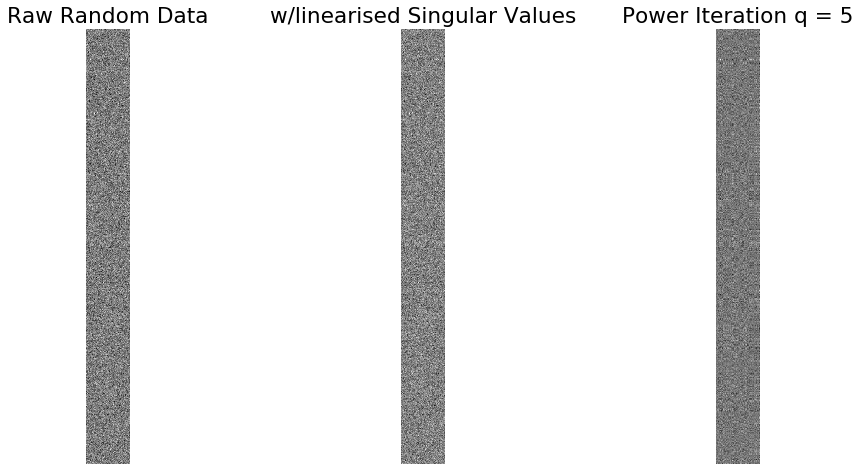

In [52]:
plt.rcParams['figure.figsize'] = [16, 8]
plt.figure()
plt.set_cmap('gray')

plt.subplot(131)
plt.imshow(X_raw)
plt.title("Raw Random Data", color='k') # np.random.randn(1000, 100)
plt.axis('off')

plt.subplot(132)
plt.imshow(X) # Linearised Singular Values
plt.title("w/linearised Singular Values", color='k')
plt.axis('off')

plt.subplot(133)
plt.imshow(Y) # Power iteration q_final
plt.title("Power Iteration q = " + str(q), color='k')
plt.axis('off')

plt.show()

<div class="alert alert-block alert-warning">
    Which should make sense, given that raising a random variable to some power should keep it a random variable, even though the distribution it had followed may have changed.